# MESA model

### Import needed packages

In [1]:
# MESA modules

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import SingleGrid
from mesa.datacollection import DataCollector
from mesa.batchrunner import BatchRunner

# Other packages

import time
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

# Different styles to chose from

plt.style.use(['science','retro'])
# plt.style.use("ggplot")
# plt.style.use("Solarize_Light2")
# plt.style.use("dark_background")
# plt.style.use('science')
# plt.style.use(['science','ieee'])
np.random.uniform()


0.5282492206789347

## Model Execution

### Run Setup

In [2]:
seed1 = 1
d_steps = 600
d_version = '26906a'
dynamic_firms = True
act_policies = 'base_scenario'
shock = {'shock_drop':-0.0, # it is relative pay attention and should be negative
         'shock_duration':60,
         'shock_start':48 }

# Define number of groups and their characteristics

# Imitators # Characteristics
imit_scen = {"e_f_r": [8,12],"b_f_r": [8,12],"g_f_r": [9.5,10.5]}   

firm_scen0 =  [{"e_f_r": [9,11],"b_f_r": [9,11],"g_f_r": [9,11],   # Group A # Characteristics
                "p_i_e": 1/3 , "p_i_g": 1/3 , "p_i_b": 1/3 ,       # Investment probabilities
                "num": 20 }]                                       # Number

firm_scen1 =  [{"e_f_r": [11,13],"b_f_r": [11,13],"g_f_r": [7,9],  # Group A # Characteristics
                "p_i_e": 0.45 , "p_i_g": 0.45 , "p_i_b": 0.1 ,     # Investment probabilities
                "num": 10 },                                       # Number
                {"e_f_r": [9,11],"b_f_r": [9,11],"g_f_r": [13,15], # Group B # Characteristics
                "p_i_e": 0.05 , "p_i_g": 0.05 , "p_i_b": 0.9 ,     # Investment probabilities
                "num": 10 }]                                       # Number

firm_scen2 =  [{"e_f_r": [13,15],"b_f_r": [13,15],"g_f_r": [9,11], # Group A # Characteristics
                "p_i_e": 0.45, "p_i_g": 0.45, "p_i_b": 0.1 ,       # Investment probabilities
                "num": 10 },                                       # Number
                {"e_f_r": [9,11],"b_f_r": [9,11],"g_f_r": [13,15], # Group B # Characteristics
                "p_i_e": 0.05 , "p_i_g": 0.05 , "p_i_b": 0.9 ,     # Investment probabilities
                "num": 10 }]                                       # Number

policies = {"base_scenario":{'λ_e' : 1/3, 'λ_b' : 1/3,'λ_g' : 1/3,
                             'λ_g_b' : 0.087, 'λ_start' : 24, 'λ_dur' : 600,
                             'σ_g' : 0.35, 'P_r_l_g' : 1 },
            "scenario0":{'λ_e' : 1/3, 'λ_b' : 1/3,'λ_g' : 1/3,
                         'σ_g' : 0, 'P_r_l_g' : 1 },
            "scenario1a":{'λ_e' : 0, 'λ_b' : 1,'λ_g' : 0,
                         'σ_g' : 0, 'P_r_l_g' : 1 },
            "scenario1b":{'λ_e' : 0.1, 'λ_b' : 0.1, 'λ_g' : 0.8,
                         'σ_g' : 0, 'P_r_l_g' : 1 },
            "scenario1c":{'λ_e' : 0, 'λ_b' : 0.5, 'λ_g' : 0.5,
                         'σ_g' : 0, 'P_r_l_g' : 1 },
            "scenario2a":{'λ_e' : 1/3, 'λ_b' : 1/3, 'λ_g' : 1/3,
                         'σ_g' : 0.4, 'P_r_l_g' : 1 },
            "scenario2ba":{'λ_e' : 1/3, 'λ_b' : 1/3, 'λ_g' : 1/3,
                         'σ_g' : 0, 'P_r_l_g' : 1 },
            "scenario1a":{'λ_e' : 1/3, 'λ_b' : 1/3, 'λ_g' : 1/3,
                         'σ_g' : 0, 'P_r_l_g' : 0.4 },
            "scenario1a":{'λ_e' : 1/3, 'λ_b' : 1/3, 'λ_g' : 1/3,
                         'σ_g' : 0.2, 'P_r_l_g' : 0.4 }}

### Run Simulations

In [3]:
from Model import Agent, EconomyModel 

np.random.seed(seed1)
start = time.time()
# model = EconomyModel(seed1, d_agents, d_steps, dynamic_firms, scenario[act_scenario],shock)
model = EconomyModel( d_steps, dynamic_firms, policies[act_policies],shock, firm_scen0, imit_scen)
for i in range(model.num_steps):
    # print('step {}'.format(i))
    model.step()

model_df = model.dc.get_model_vars_dataframe()
agent_df = model.dc.get_agent_vars_dataframe()
agent_df = agent_df.reset_index()
end = time.time()
print(end - start)


0.7634890079498291


#### Save the resulting files

In [4]:
# model_df.to_csv("Data/model_{}_{}_{}.csv".format(d_agents,d_steps,d_version))
# agent_df2 = agent_df.reset_index()
# agent_df2.to_csv("Data/agent_{}_{}_{}.csv".format(d_agents,d_steps,d_version)) 

#### Import past results

In [5]:
# model_df = pd.read_csv("Data/model_{}_{}_{}.csv".format(d_agents,d_steps,d_version))
# agent_df = pd.read_csv("Data/agent_{}_{}_{}.csv".format(d_agents,d_steps,d_version)) 

#### Secondary stuff for the notebook

In [6]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
x_lin = model_df.index/12+2020

### Inspect agent_df

In [7]:
model_df.shape


(600, 12)

In [8]:
x_lin.shape

(600,)

In [9]:
agent_df.groupby(['Step'])["AgentID"].sum().shape

(600,)

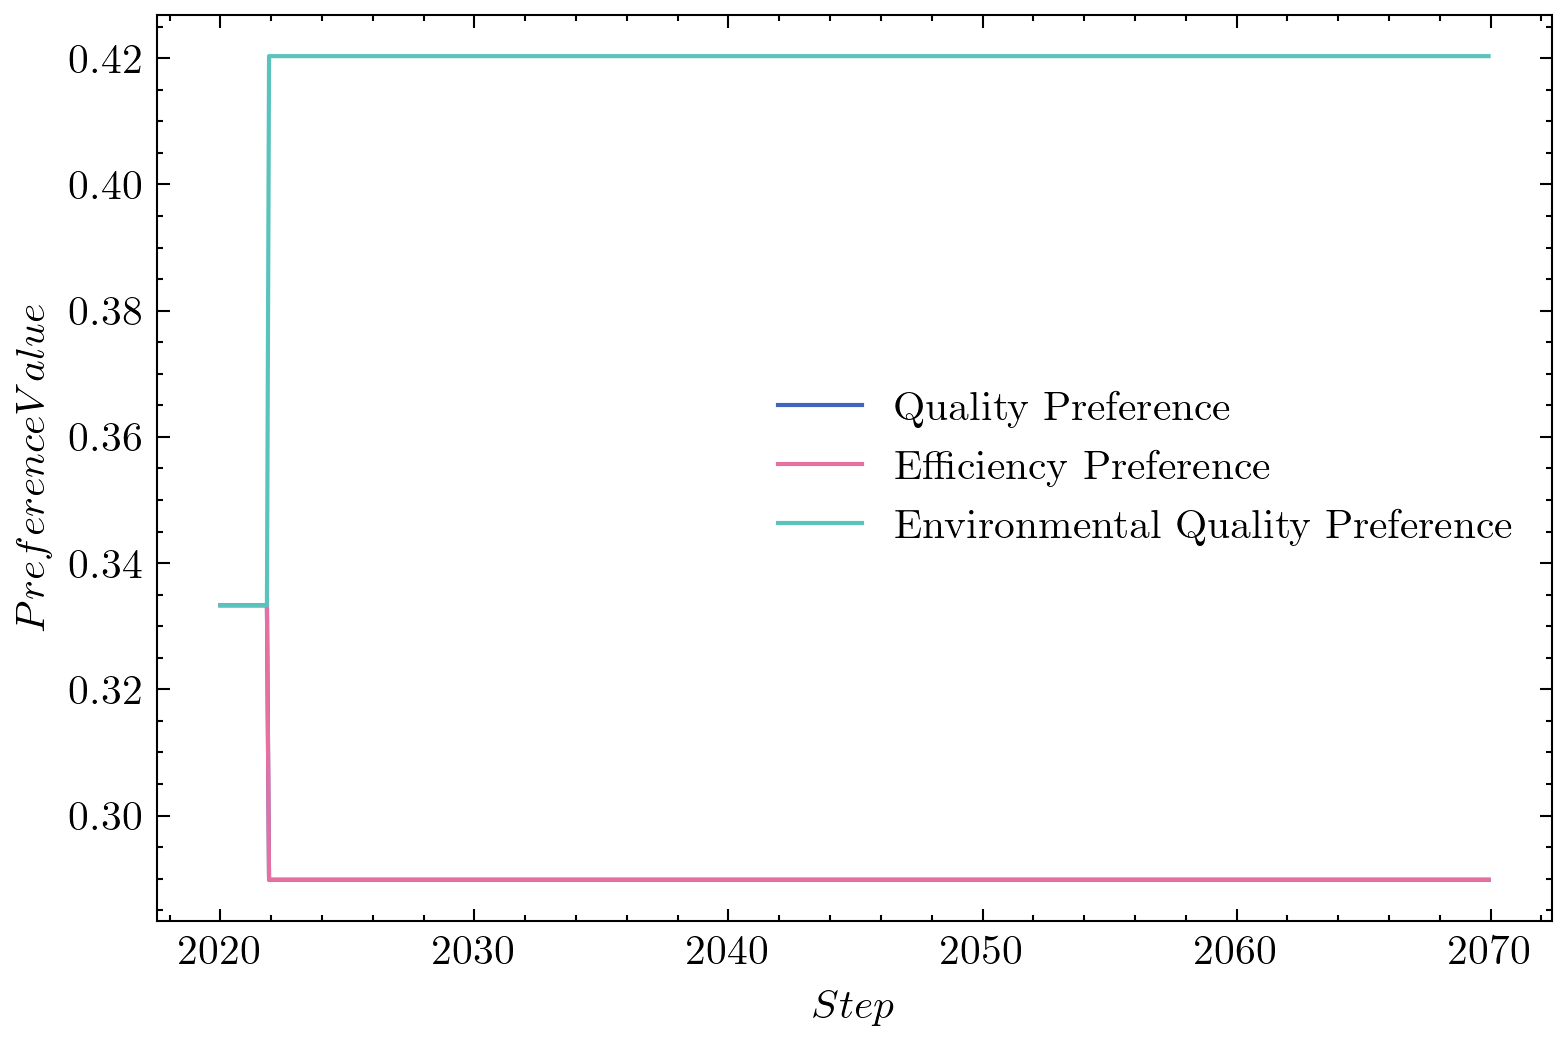

In [10]:
plt.figure(num=None, figsize=(6, 4), dpi=300)

plt.plot(x_lin,model_df.λ_b, label = "Quality Preference")
plt.plot(x_lin,model_df.λ_e, label = "Efficiency Preference")
plt.plot(x_lin,model_df.λ_g, label = "Environmental Quality Preference")
plt.xlabel('$Step$')
plt.ylabel("$Preference Value$")
plt.legend()
# plt.savefig('../Writing/Mid-term/Images/Recession/PreferencesRec.pdf')
plt.show()

In [11]:
agent_df.head(20)

Step  AgentID  name       e_fs        p_fs       b_fs       g_fs  \
0      1        0     0   9.834044  324.724251  10.440649   9.000229   
1      1        1     1   9.604665  326.802680   9.293512   9.184677   
2      1        2     2   9.372520  328.941039   9.691121   9.793535   
3      1        3     3  10.077633  322.552519   9.838389  10.370439   
4      1        4     4   9.408904  328.603496  10.756235   9.054775   
5      1        5     5  10.340935  320.243835   9.834610  10.117380   
6      1        6     6   9.280774  329.796252   9.396203  10.601489   
7      1        7     7  10.936523  315.158291   9.626848  10.384645   
8      1        8     8  10.752778  316.708028  10.789213   9.170088   
9      1        9     9   9.078110  331.706559   9.339661  10.756285   
10     1       10    10   9.196694  330.585200   9.842215  10.915779   
11     1       11    11  10.066331  322.652511  10.383754   9.631031   
12     1       12    12  10.373002  319.965306  10.669251   9.036577   
13     1       13    13  10.500289  318.865182  10.977722  10.496331   
14     1       14    14   9.560888  327.203184  10.578559   9.206452   
15     1       15    15   9.895787  324.170401  10.817191   9.587228   
16     1       16    16   9.575551  327.068900   9.260057   9.038734   
17     1       17    17  10.357671  320.098397   9.423256   9.531093   
18     1       18    18   9.983146  323.390714   9.106725  10.148235   
19     1       19    19   9.293457  329.677676  10.178611  10.399517   

         I_fs     ms_fs          r_fs        c_fs        f_c_fs          π_fs  \
0    9.740272  0.035833  3.583277e+07  270.603542  4.658260e+06  1.313868e+06   
1    9.359270  0.019694  1.969447e+07  272.335567  2.560281e+06  7.221307e+05   
2    9.617377  0.029619  2.961856e+07  274.117532  3.850413e+06  1.086014e+06   
3   10.093146  0.061110  6.111009e+07  268.793766  7.944312e+06  2.240703e+06   
4    9.713126  0.034364  3.436367e+07  273.836247  4.467277e+06  1.260001e+06   
5   10.095511  0.061325  6.132526e+07  266.869862  7.972283e+06  2.248593e+06   
6    9.741694  0.035911  3.591135e+07  274.830210  4.668475e+06  1.316749e+06   
7   10.301924  0.083079  8.307872e+07  262.631909  1.080023e+07  3.046220e+06   
8   10.208486  0.072466  7.246602e+07  263.923356  9.420583e+06  2.657088e+06   
9    9.697570  0.033547  3.354738e+07  276.422133  4.361159e+06  1.230071e+06   
10   9.960010  0.050074  5.007386e+07  275.487667  6.509601e+06  1.836041e+06   
11  10.022271  0.054980  5.498021e+07  268.877093  7.147427e+06  2.015941e+06   
12  10.000325  0.053202  5.320178e+07  266.637755  6.916231e+06  1.950732e+06   
13  10.655741  0.137870  1.378699e+08  265.720985  1.792309e+07  5.055230e+06   
14   9.765002  0.037222  3.722199e+07  272.669320  4.838859e+06  1.364806e+06   
15  10.086782  0.060535  6.053465e+07  270.142001  7.869504e+06  2.219604e+06   
16   9.288844  0.017585  1.758489e+07  272.557416  2.286035e+06  6.447792e+05   
17   9.761921  0.037046  3.704620e+07  266.748664  4.816006e+06  1.358361e+06   
18   9.735092  0.035548  3.554802e+07  269.492262  4.621242e+06  1.303427e+06   
19   9.945493  0.048990  4.899022e+07  274.731396  6.368728e+06  1.796308e+06   

            s_fs  step   proj     green  efficiency   quality  p_r_imits  age  \
0   4.379561e+06     1  False  0.333333    0.333333  0.333333   0.038229    0   
1   2.407102e+06     1  False  0.333333    0.333333  0.333333   0.022985    0   
2   3.620047e+06     1  False  0.333333    0.333333  0.333333   0.032515    0   
3   7.469011e+06     1  False  0.333333    0.333333  0.333333   0.060179    0   
4   4.200004e+06     1  False  0.333333    0.333333  0.333333   0.036892    0   
5   7.495309e+06     1  False  0.333333    0.333333  0.333333   0.060359    0   
6   4.389165e+06     1  False  0.333333    0.333333  0.333333   0.038300    0   
7   1.015407e+07     1  False  0.333333    0.333333  0.333333   0.078130    0   
8   8.856959e+06     1  False  0.333333    0.333333  0.33333

In [12]:
agent_df[agent_df.AgentID >= 10].groupby(['Step']).name.count().values[1:].shape

(599,)

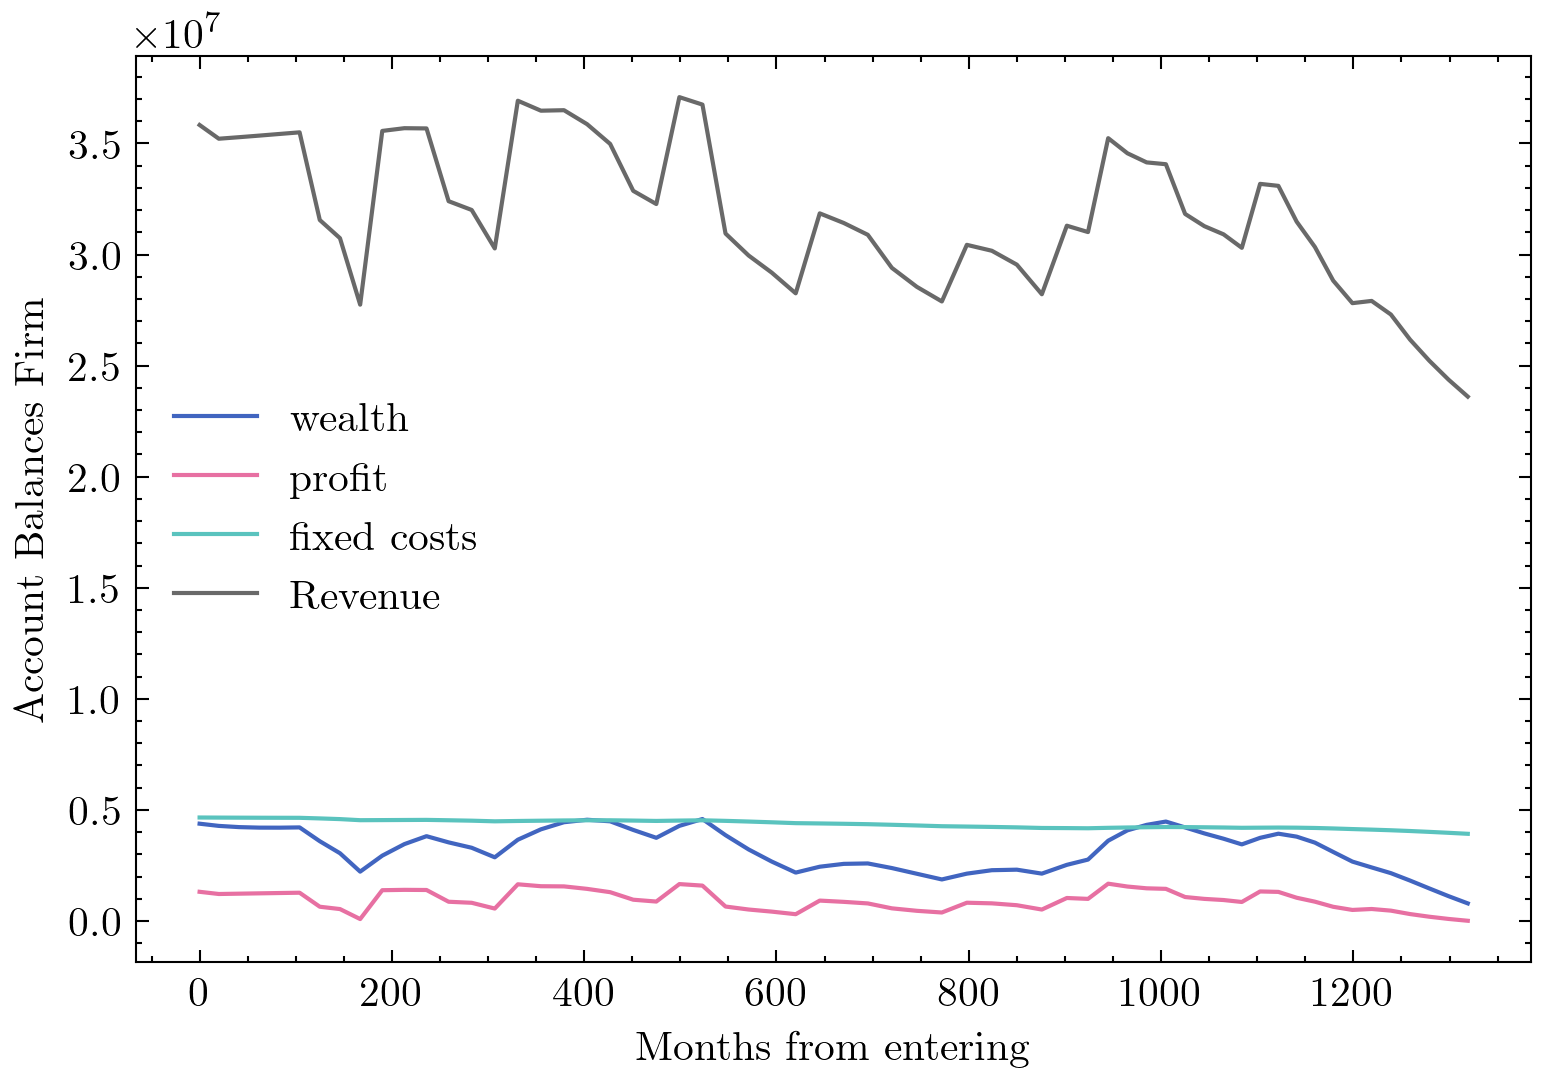

In [13]:
plt.figure(num=None, figsize=(6, 4), dpi=300)
plt.plot(agent_df[agent_df.name == 0].s_fs, label = 'wealth')
plt.plot(agent_df[agent_df.name == 0].π_fs, label = 'profit')
plt.plot(agent_df[agent_df.name == 0].f_c_fs, label = 'fixed costs')
plt.plot(agent_df[agent_df.name == 0].r_fs, label = 'Revenue')
plt.xlabel('Months from entering')
plt.legend()
plt.ylabel('Account Balances Firm')
plt.show()

# Herfindahl–Hirschman

In [14]:
def hh_f(x):
    return sum([i**2 for i in x])

hh_index= agent_df.groupby(['step'])["ms_fs"].apply(hh_f)

In [15]:
print(round(hh_index.iloc[0],3), round(hh_index.max(),3), round(hh_index.min(),3), round(hh_index.median(),3), round(hh_index.iloc[-1],3))

0.064 0.064 0.032 0.042 0.036


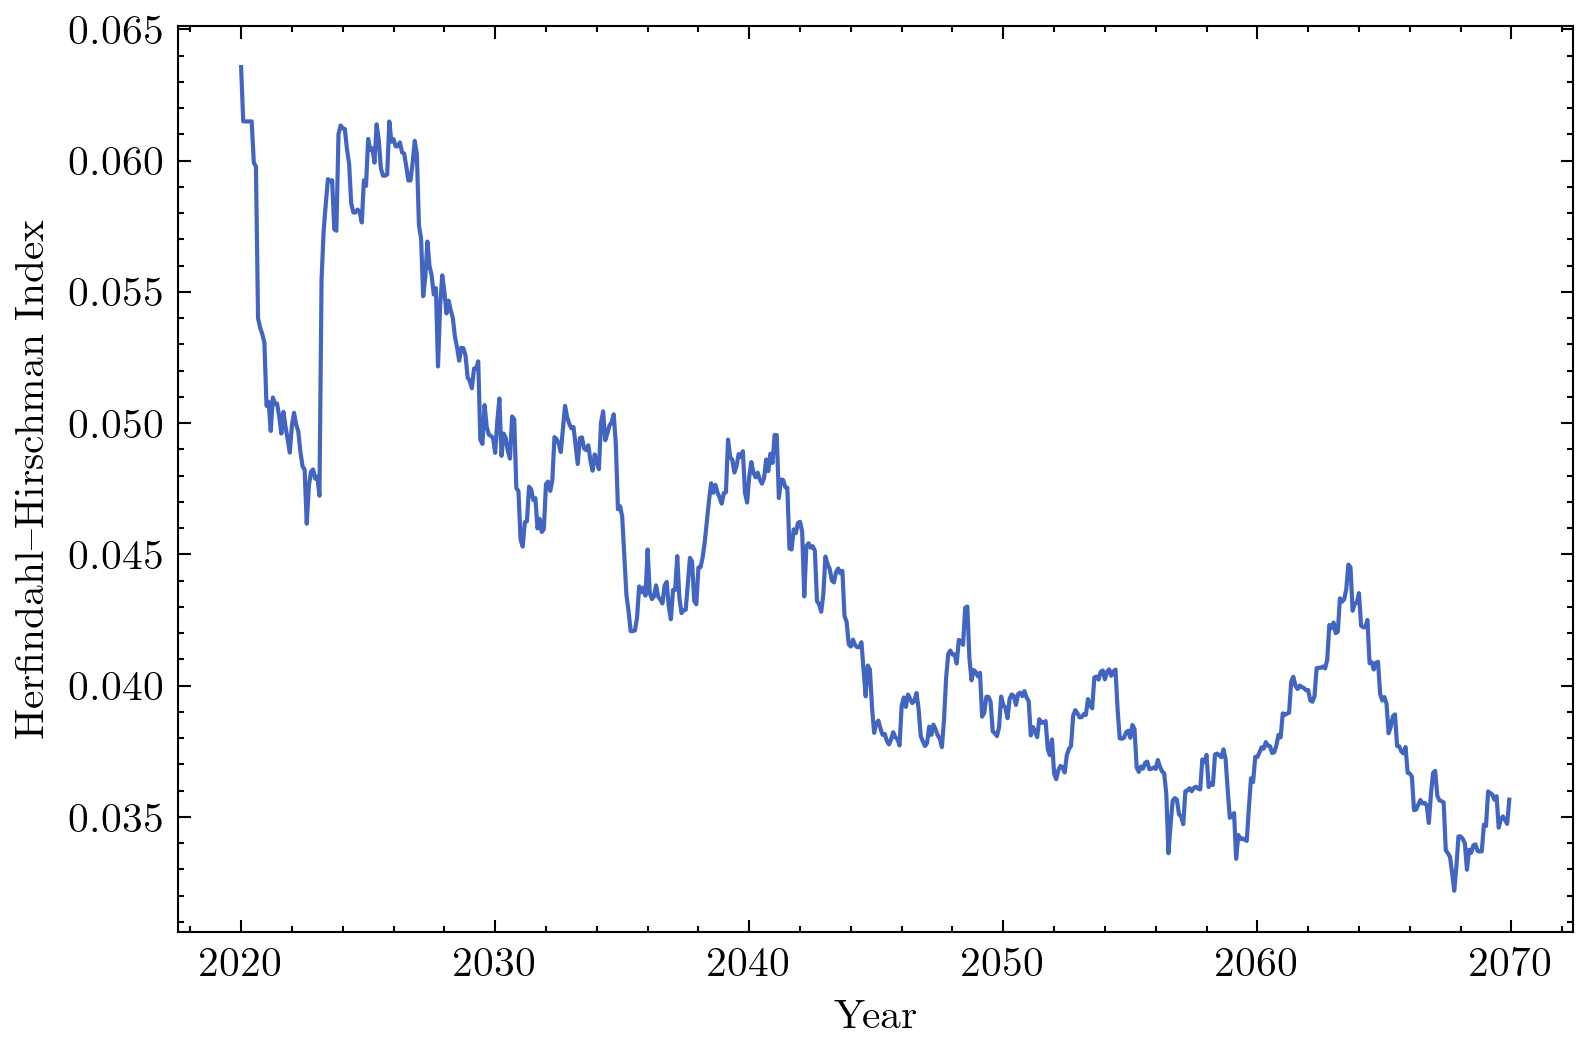

In [16]:
plt.figure(num=None, figsize=(6, 4), dpi=300)
plt.plot(x_lin,hh_index)
plt.xlabel("Year")
plt.ylabel("Herfindahl–Hirschman Index")
# plt.savefig('../Writing/My_Thesis/Chapters/ModelResults/Images/HHBaseCase20.pdf')
plt.show()

In [17]:
new_agents = []
for i in range(1,d_steps+1):
    temp_df = agent_df[agent_df.Step == i]
    new_agents.append(temp_df[temp_df.AgentID >= firm_scen0[0]['num']].AgentID.count())

In [18]:
round(sum(new_agents)/len(new_agents),2)

15.8

In [19]:
print(model_df.agents.iloc[-1]-new_agents[-1],model_df.agents.iloc[240]-new_agents[240],
round(model_df.agents.mean(),2))

9 10 26.78


### Inspect model_df

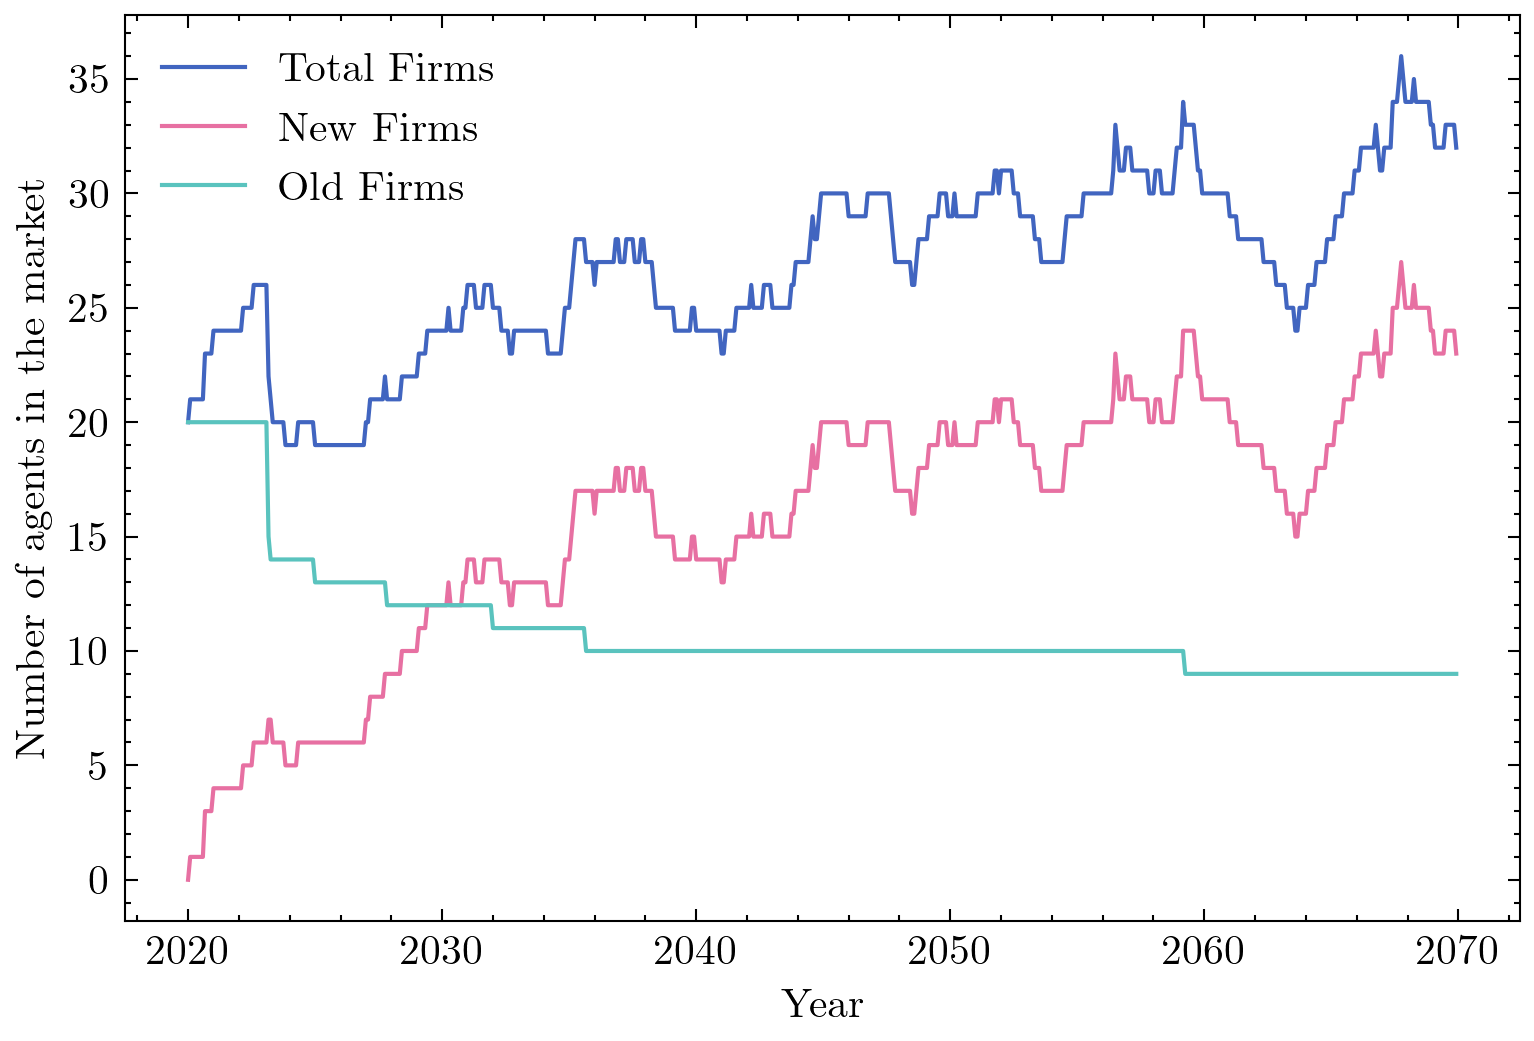

In [20]:
plt.figure(num=None, figsize=(6, 4), dpi=300)
plt.plot(x_lin,model_df.agents, label = 'Total Firms')
plt.plot(x_lin,new_agents, label = 'New Firms')
plt.plot(x_lin,model_df.agents - new_agents, label = 'Old Firms')
# plt.savefig('../Writing/Mid-term/Images/Recession/FirmsRec.pdf')
plt.xlabel("Year")
plt.ylabel("Number of agents in the market")
plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters//ModelVerification/Images/VerMulVarYesNumFirms.pdf')
plt.show()

In [21]:
model_df.agents.iloc[-100:].mean()

29.93

# Income

#### Plot the GDPs

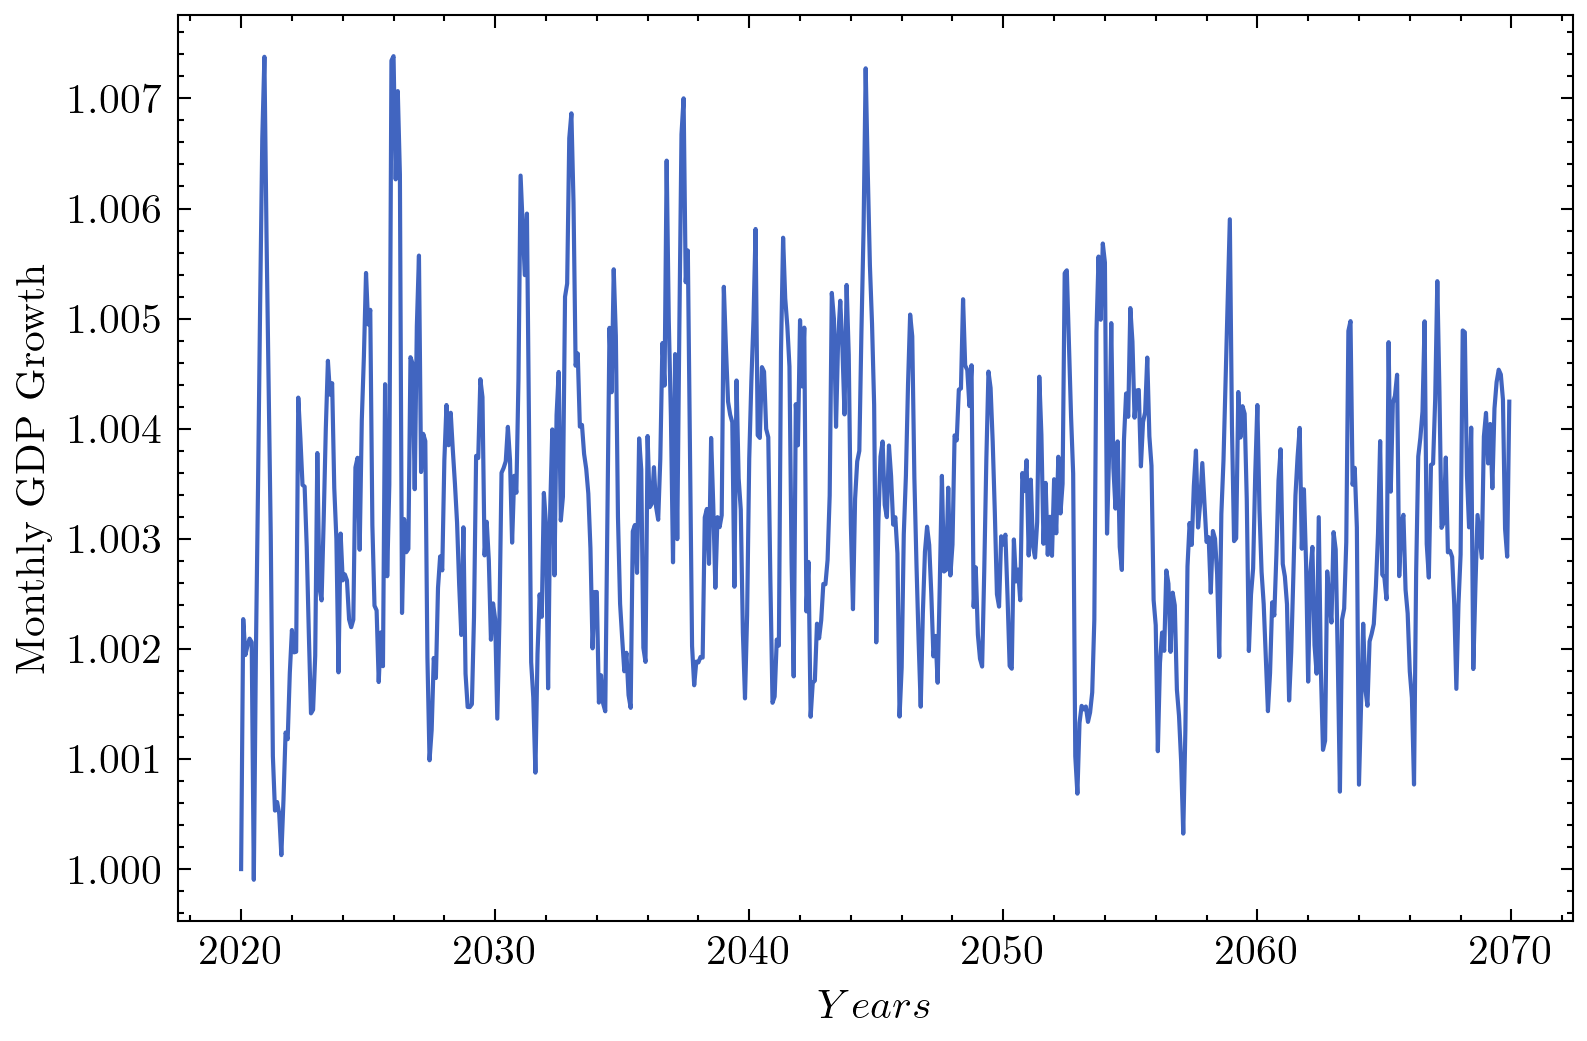

In [22]:
plt.figure(num=None, figsize=(6, 4), dpi=300)
plt.plot(x_lin,model_df.GDPGrowth)
plt.xlabel('$Years$')
plt.ylabel('Monthly GDP Growth')
# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/VerMulVarNoGDPgrowth.pdf')
plt.show()

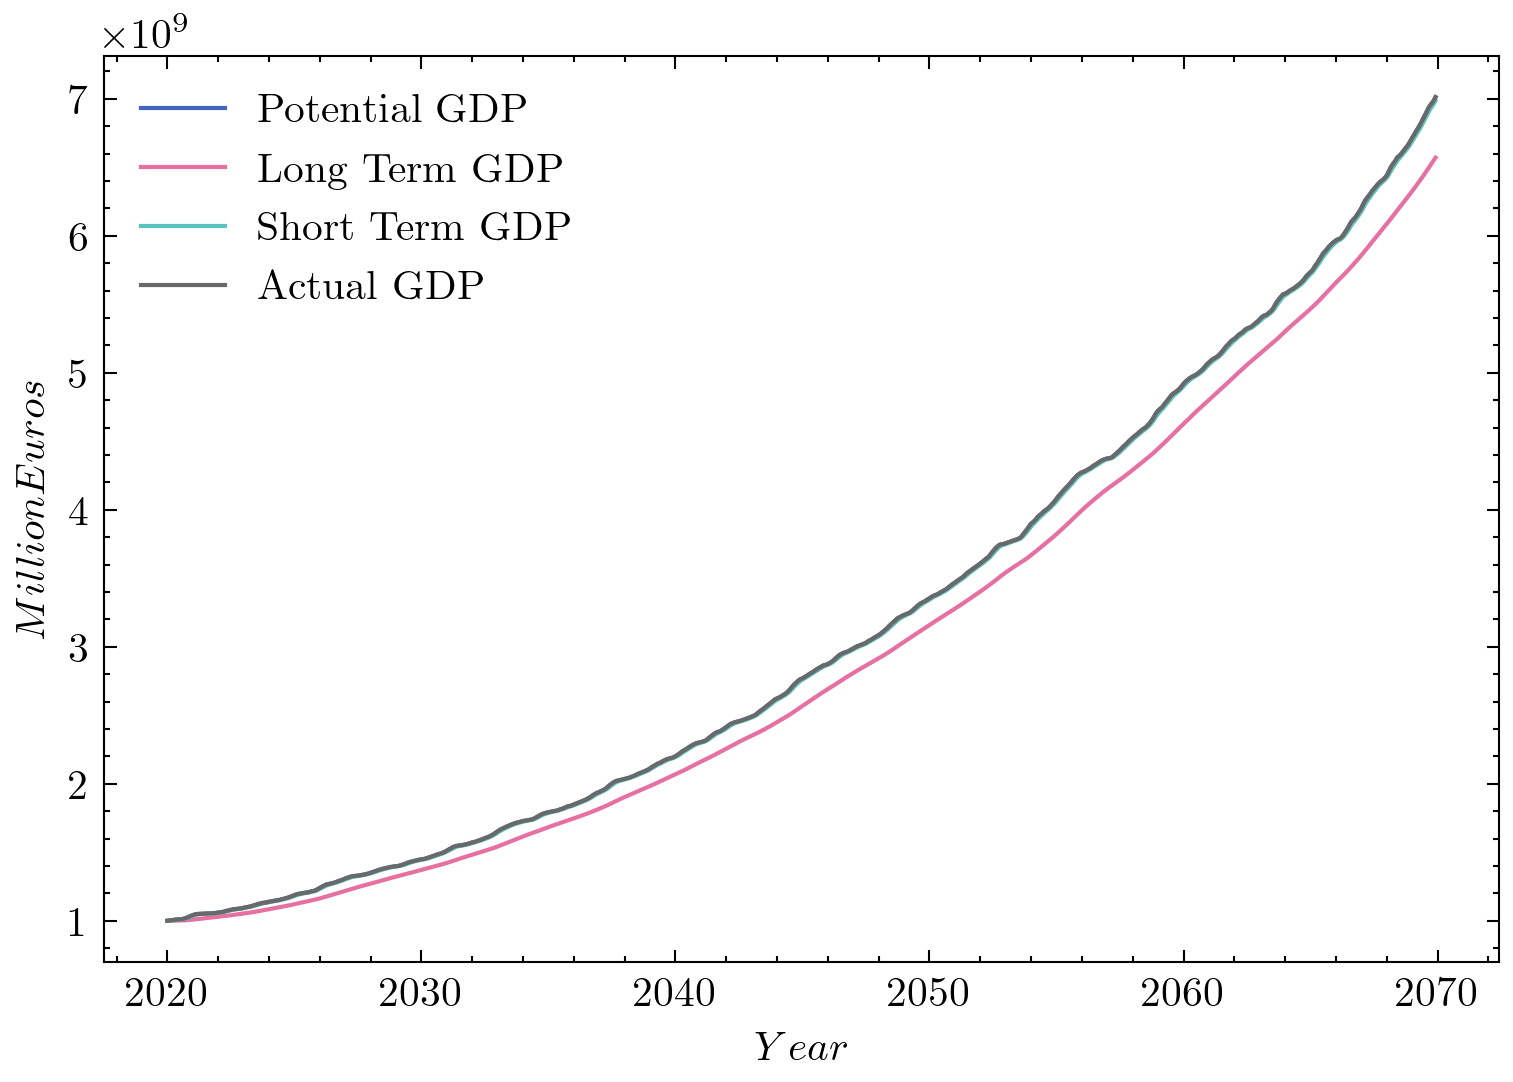

In [23]:
plt.figure(num=None, figsize=(6, 4), dpi=300)


pd.set_option('display.max_rows', None)
# model_df

plt.plot(x_lin,model_df.PotentialGDP, label = "Potential GDP")
plt.plot(x_lin,model_df.LongTermGDP, label = "Long Term GDP")
plt.plot(x_lin,model_df.shortTermGDP, label = "Short Term GDP")
plt.plot(x_lin,model_df.ActualGDP, label = "Actual GDP")
plt.xlabel("$Year$")
plt.ylabel("$Million Euros$")
plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/VerSinNoGDPs.pdf')
plt.show()

#### Some results

- Percentage of time that no project takes place.
- Percentage of time with negative wealth
- Mean wealth ratio


In [24]:
agent_df.proj.value_counts(normalize = True)

green         0.308123
False         0.279241
efficiency    0.214068
quality       0.198568
Name: proj, dtype: float64

In [25]:
agent_df[agent_df.s_fs<0].s_fs.count()/agent_df.shape[0]

0.003983815748521631

### Firms survived in the end

In [26]:
agent_df[agent_df.step == d_steps]

Step  AgentID  name       e_fs        p_fs       b_fs       g_fs  \
16033   600        3     3  18.027633  263.191988  19.588389  33.620439   
16034   600        9     9  19.428110  253.813643  19.689661  29.206285   
16035   600       10    10  19.246694  255.024419  20.792215  29.965779   
16036   600       11    11  22.066331  236.175132  20.583754  27.031031   
16037   600       12    12  16.373002  274.450420  19.369251  33.036577   
16038   600       15    15  16.645787  272.574683  19.367191  33.437228   
16039   600       17    17  15.907671  277.672803  18.573256  34.881093   
16040   600       18    18  18.083146  262.818370  22.606725  29.048235   
16041   600       19    19  14.543457  287.322106  22.628611  33.649517   
16042   600       38    38  18.552696  259.665586  15.790226  34.321340   
16043   600       49    49  18.351904  261.012279  19.953618  29.487984   
16044   600       58    58  20.414698  247.234954  15.954171  31.632928   
16045   600       68    68  17.705702  265.362950  19.322326  30.807307   
16046   600       74    74  22.180704  235.403947  18.844550  27.333395   
16047   600       76    76  22.544200  232.946274  18.644175  27.959280   
16048   600       78    78  17.592024  266.131421  16.385795  34.529201   
16049   600       82    82  15.402322  281.208919  17.041194  36.592937   
16050   600       87    87  16.989111  270.226326  23.326235  28.334565   
16051   600       91    91  15.879870  277.866299  24.564877  27.933395   
16052   600       94    94  23.549111  226.086094  16.764757  26.678352   
16053   600       95    95  21.109051  242.598731  18.096053  27.313412   
16054   600       99    99  18.610787  259.276358  22.761425  24.837228   
16055   600      100   100  15.511331  280.442652  17.750421  30.572635   
16056   600      101   101  17.431714  267.216967  22.154020  25.834186   
16057   600      102   102  19.649698  252.335589  21.687505  26.097928   
16058   600      103   103  14.201208  289.800040  19.260472  36.219143   
16059   600      104   104  21.638146  239.054504  20.073392  22.092071   
16060   600      105   105  17.503228  266.732436  20.493524  26.879635   
16061   600      106   106  17.258891  268.389789  16.562326  31.652919   
16062   600      107   107  14.111883  290.451123  22.018389  31.720439   
16063   600      108   108  19.212633  255.251825  21.871722  24.570056   
16064   600      109   109  13.997090  291.290603  15.472075  39.825486   

            I_fs     ms_fs          r_fs        c_fs        f_c_fs  \
16033  23.997140  0.062621  4.390889e+08  219.326657  5.113035e+07   
16034  23.148990  0.036501  2.559416e+08  211.511369  3.124344e+07   
16035  23.708045  0.052211  3.660971e+08  212.520349  4.649597e+07   
16036  23.551609  0.047276  3.314887e+08  196.812610  3.971676e+07   
16037  23.090179  0.035135  2.463597e+08  228.708683  2.900749e+07   
16038  23.318162  0.040714  2.854794e+08  227.145569  3.346111e+07   
16039  23.143750  0.036378  2.550740e+08  231.394002  2.938813e+07   
16040  23.545132  0.047081  3.301240e+08  219.015309  3.921141e+07   
16041  23.520414  0.046345  3.249635e+08  239.435088  3.904146e+07   
16042  22.930227  0.031656  2.219655e+08  216.387988  2.699350e+07   
16043  22.950246  0.032073  2.248900e+08  217.510232  2.768636e+07   
16044  22.848452  0.030004  2.103836e+08  206.029128  2.545153e+07   
16045  22.920203  0.031449  2.205145e+08  221.135792  2.757786e+07   
16046  23.098834  0.035333  2.477485e+08  196.169956  3.057629e+07   
16047  23.357343  0.041752  2.927601e+08  194.121895  3.660104e+07   
16048  22.881172  0.030655  2.149484e+08  221.776184  2.790583e+07   
16049  22.818117  0.029412  2.062326e+08  234.340766  2.663696e+07   
16050  23.091306  0.035161  2.465401e+08  225.188605  2.727346e+07   
16051  22.848568  0.030006  2.103996e+08  231.555249  2.647967e+07   
16052  22.489368  0.023658  1.658895e+08  188.405078  1.966133e+07   
16053  22.496844  0.023777  1.667186e+08  202.165609  1.99961

In [27]:
# import matplotlib
# import scipy.interpolate 

# min_gfs = 8
# max_gfs = 30

# fig= plt.figure(figsize=(9,6), dpi = 300)

# norm = matplotlib.colors.Normalize(vmin=8,vmax=30)

# # choose a colormap
# c_m = matplotlib.cm.summer

# # create a ScalarMappable and initialize a data structure
# s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
# s_m.set_array([])

# for i in agent_df.name.unique():
#     x_sm = agent_df[agent_df.name == i].step/12 + 2020
#     y_sm = agent_df[agent_df.name == i].ms_fs
#     x_smooth = np.linspace(x_sm.min(), x_sm.max(), 100)
#     y_smooth = scipy.interpolate.spline(x, y, x_smooth)
#     plt.plot(agent_df[agent_df.name == i].step/12 + 2020,
#              agent_df[agent_df.name == i].ms_fs,
#              color=s_m.to_rgba(agent_df[agent_df.name == i].g_fs.mean()))

# # having plotted the 11 curves we plot the colorbar, using again our
# # ScalarMappable
# plt.colorbar(s_m)

# plt.xlabel("$Year$")
# plt.ylabel("$Market Shares$")
# # plt.legend()
# # plt.savefig('../Writing/My_Thesis/Chapters/ModelResults/Images/MarketSharesBaseCase20.pdf')
# plt.show()

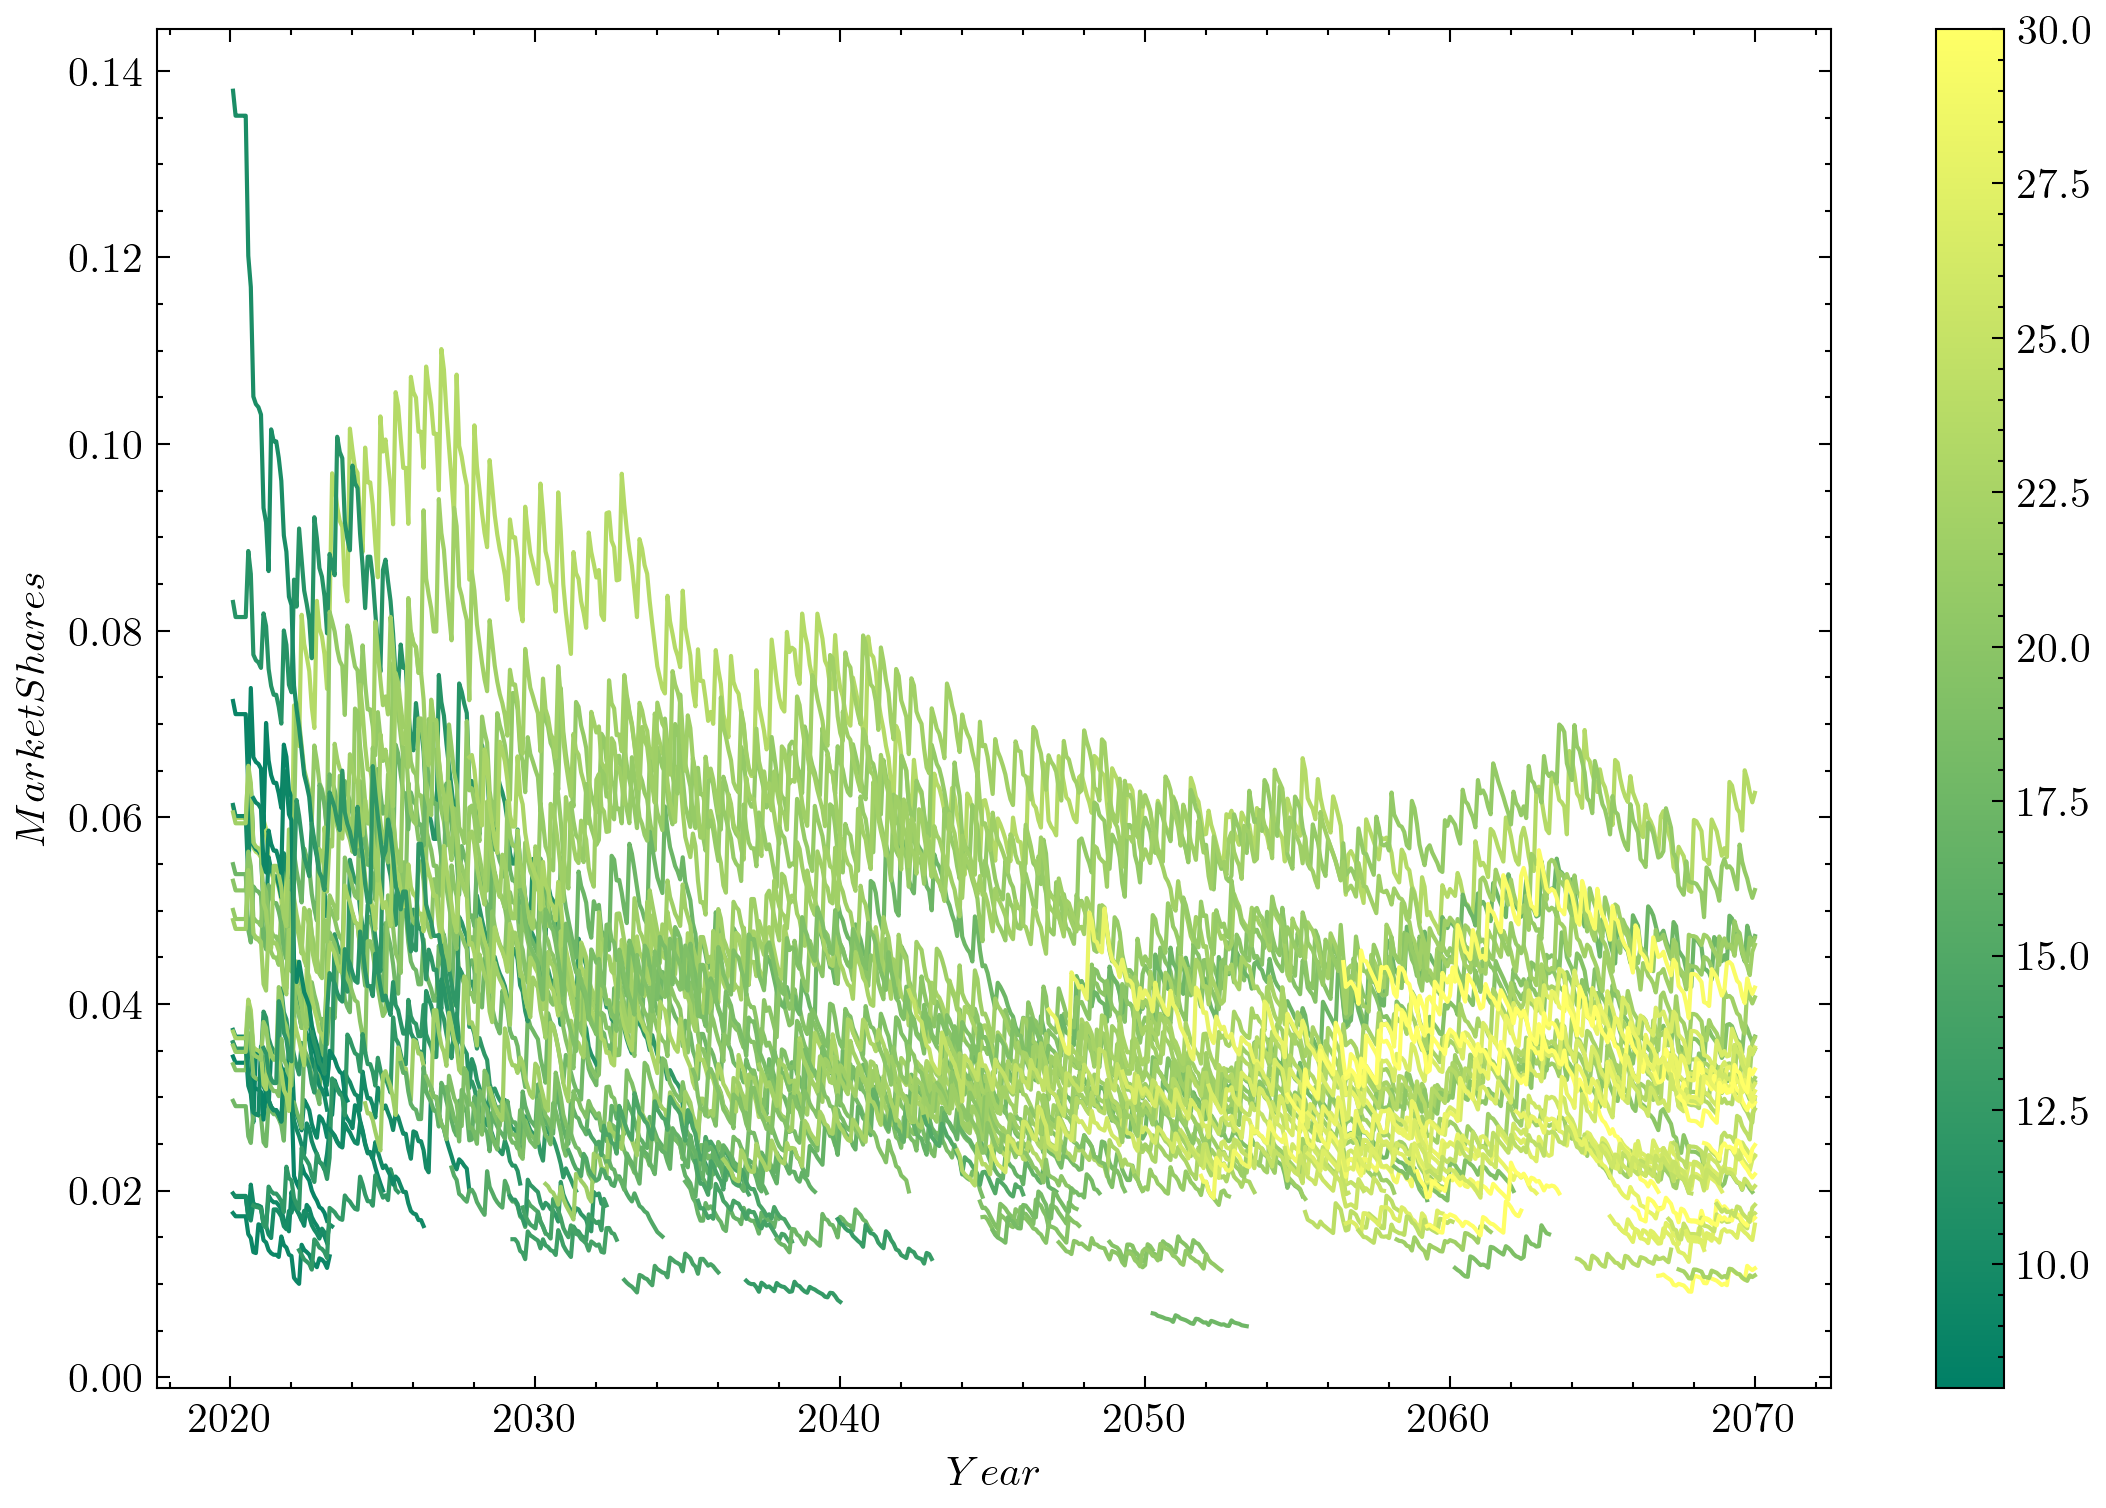

In [28]:
import matplotlib

min_gfs = 8
max_gfs = 30

fig= plt.figure(figsize=(9,6), dpi = 300)

norm = matplotlib.colors.Normalize(vmin=8,vmax=30)

# choose a colormap
c_m = matplotlib.cm.summer

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

for i in agent_df.name.unique():  
    # clr = 'b'
    # if i > 0:
        # clr = 'g'
    plt.plot(agent_df[agent_df.name == i].step/12 + 2020,
             agent_df[agent_df.name == i].ms_fs
            , color=s_m.to_rgba(agent_df[agent_df.name == i].g_fs.mean())
            #  ,color = clr
            )

# having plotted the 11 curves we plot the colorbar, using again our
# ScalarMappable
plt.colorbar(s_m)

plt.xlabel("$Year$")
plt.ylabel("$Market Shares$")
# plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters/ModelResults/Images/MarketSharesBaseCase20ProcBSIBB.pdf')
plt.show()

### Plot of market shares by different firms

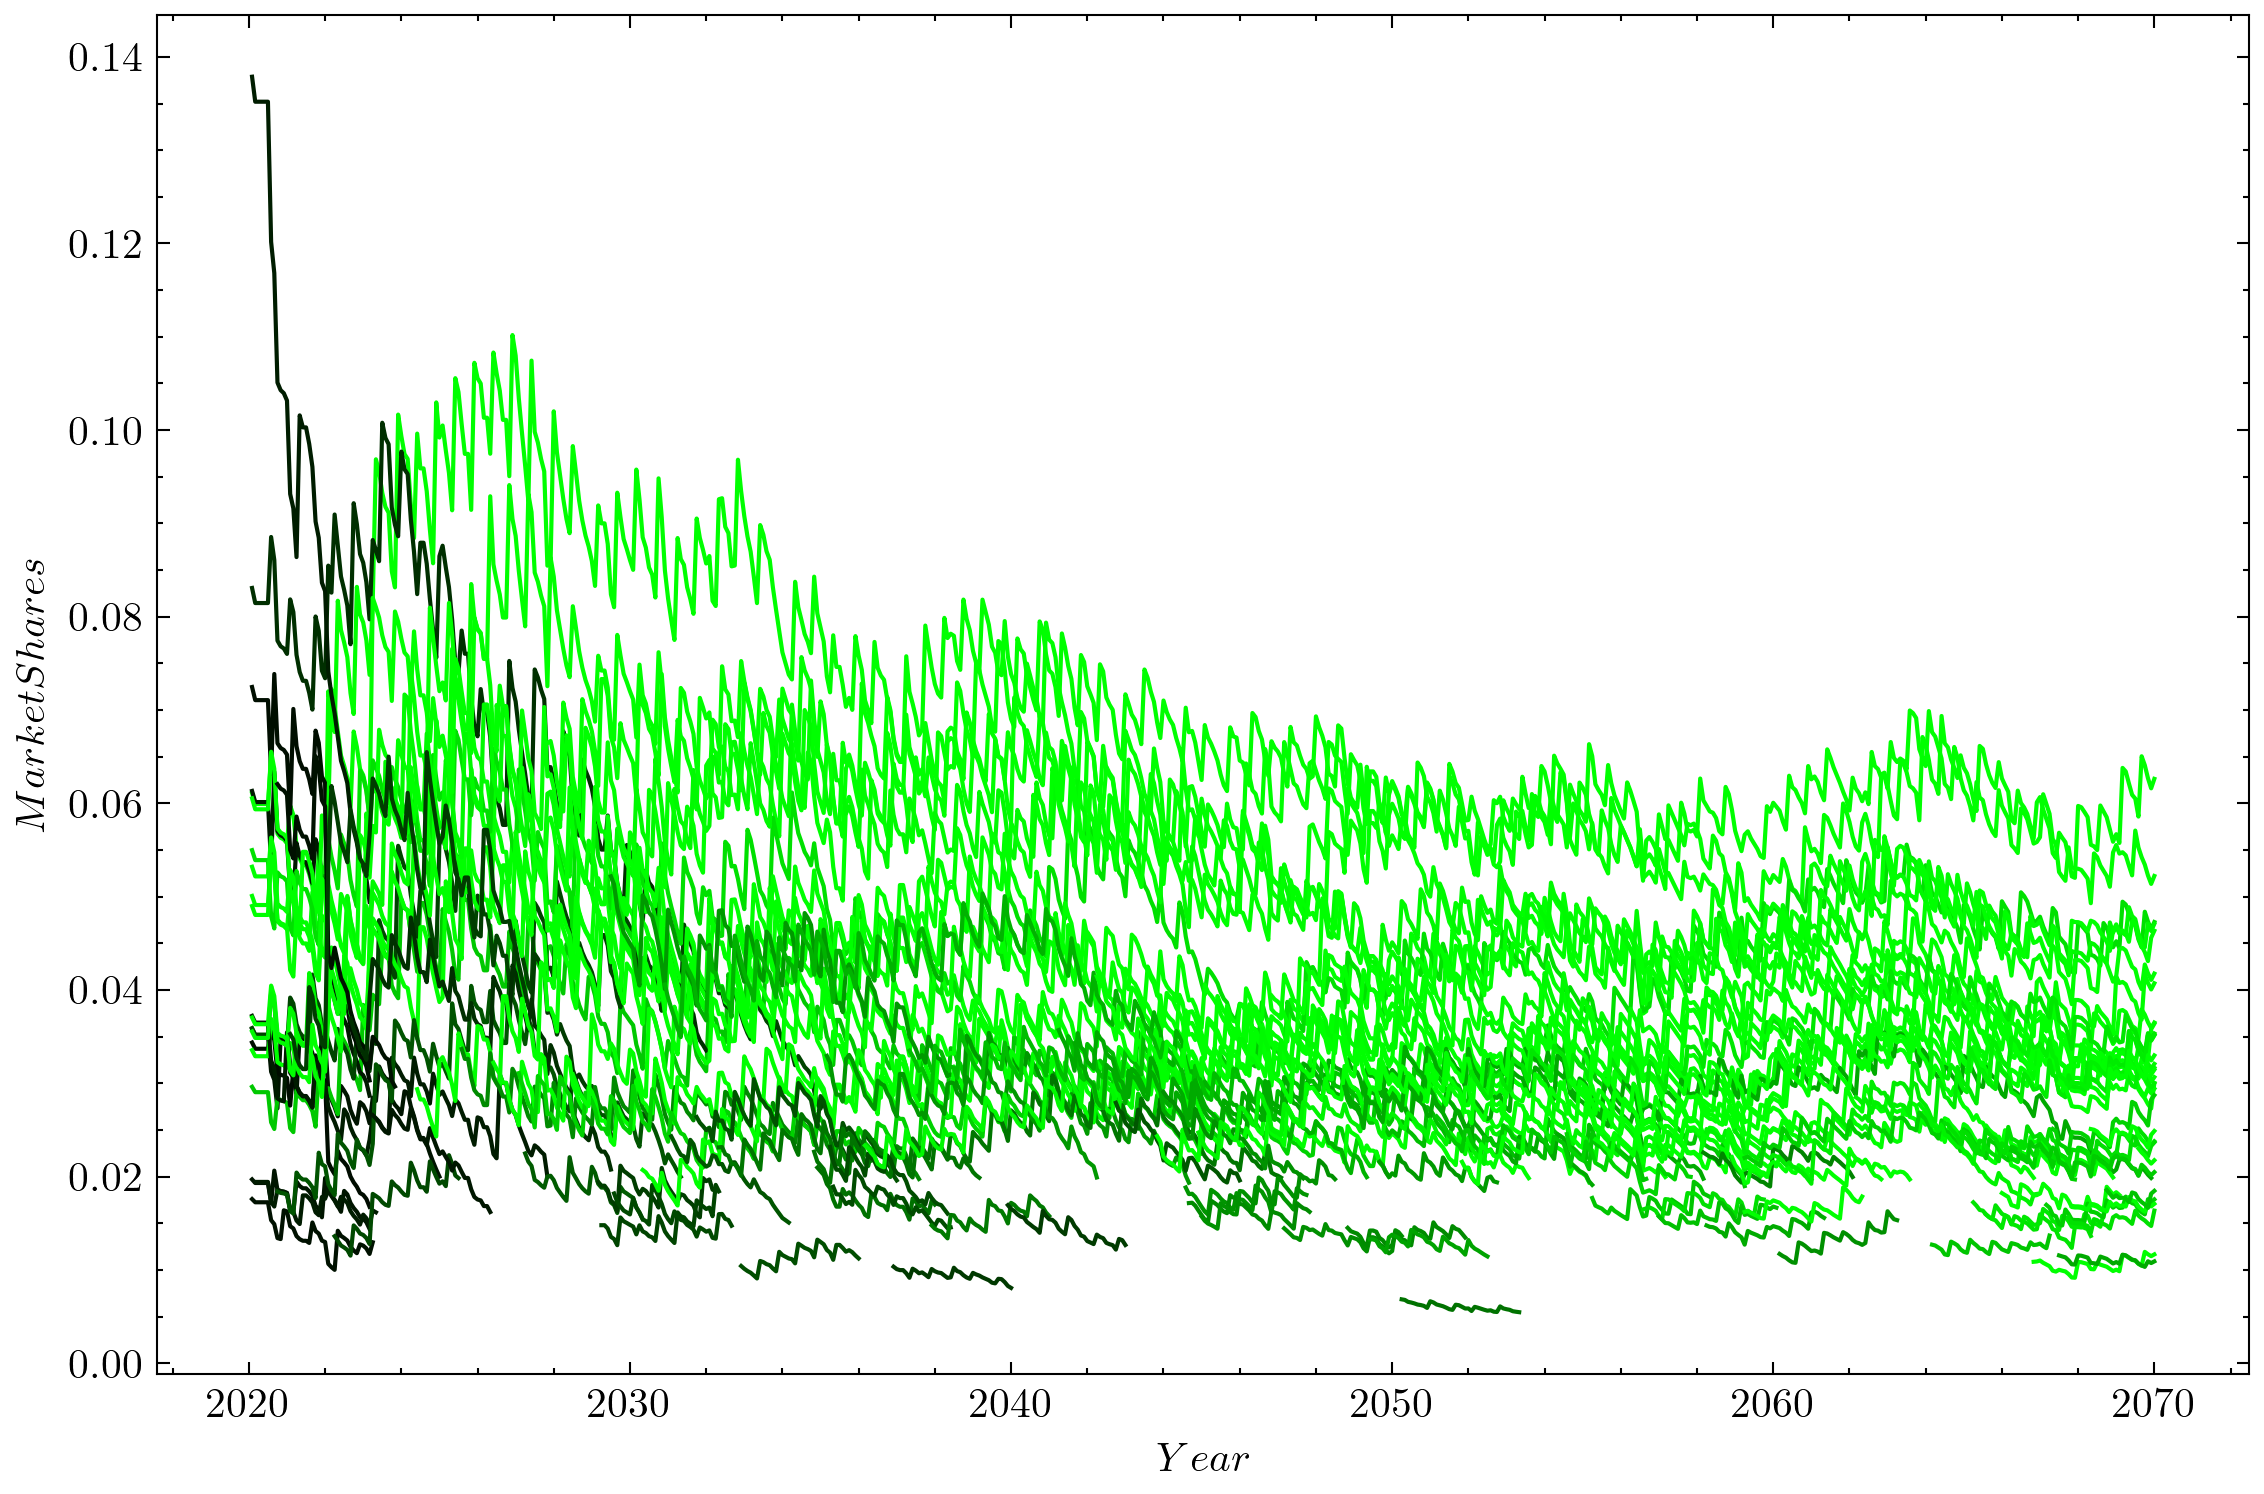

In [29]:
min_gfs = 8
max_gfs = 30

fig= plt.figure(figsize=(9,6), dpi = 300)

for i in agent_df.name.unique():
    color_gfs = (agent_df[agent_df.name == i].g_fs.max() - min_gfs)/(max_gfs-min_gfs)
    color_gfs = 1 if color_gfs > 1 else color_gfs
    color_gfs = 0 if color_gfs < 0 else color_gfs
    plt.plot(agent_df[agent_df.name == i].step/12 + 2020, agent_df[agent_df.name == i].ms_fs, label =   
    "Firm " + str(i),
    # c = [min(color_gfs*2,1),max(color_gfs*2-1,0),0])
    c = [0,min(max(color_gfs,0),1),0])
    # if i == 36:
    #      plt.plot(agent_df[agent_df.name == i].step, agent_df[agent_df.name == i].ms_fs, 'r')
    
plt.xlabel("$Year$")
plt.ylabel("$Market Shares$")
# # plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters/ModelResults/Images/MarketSharesBaseCase10.pdf')
plt.show()


### Market Shares without Color Coding

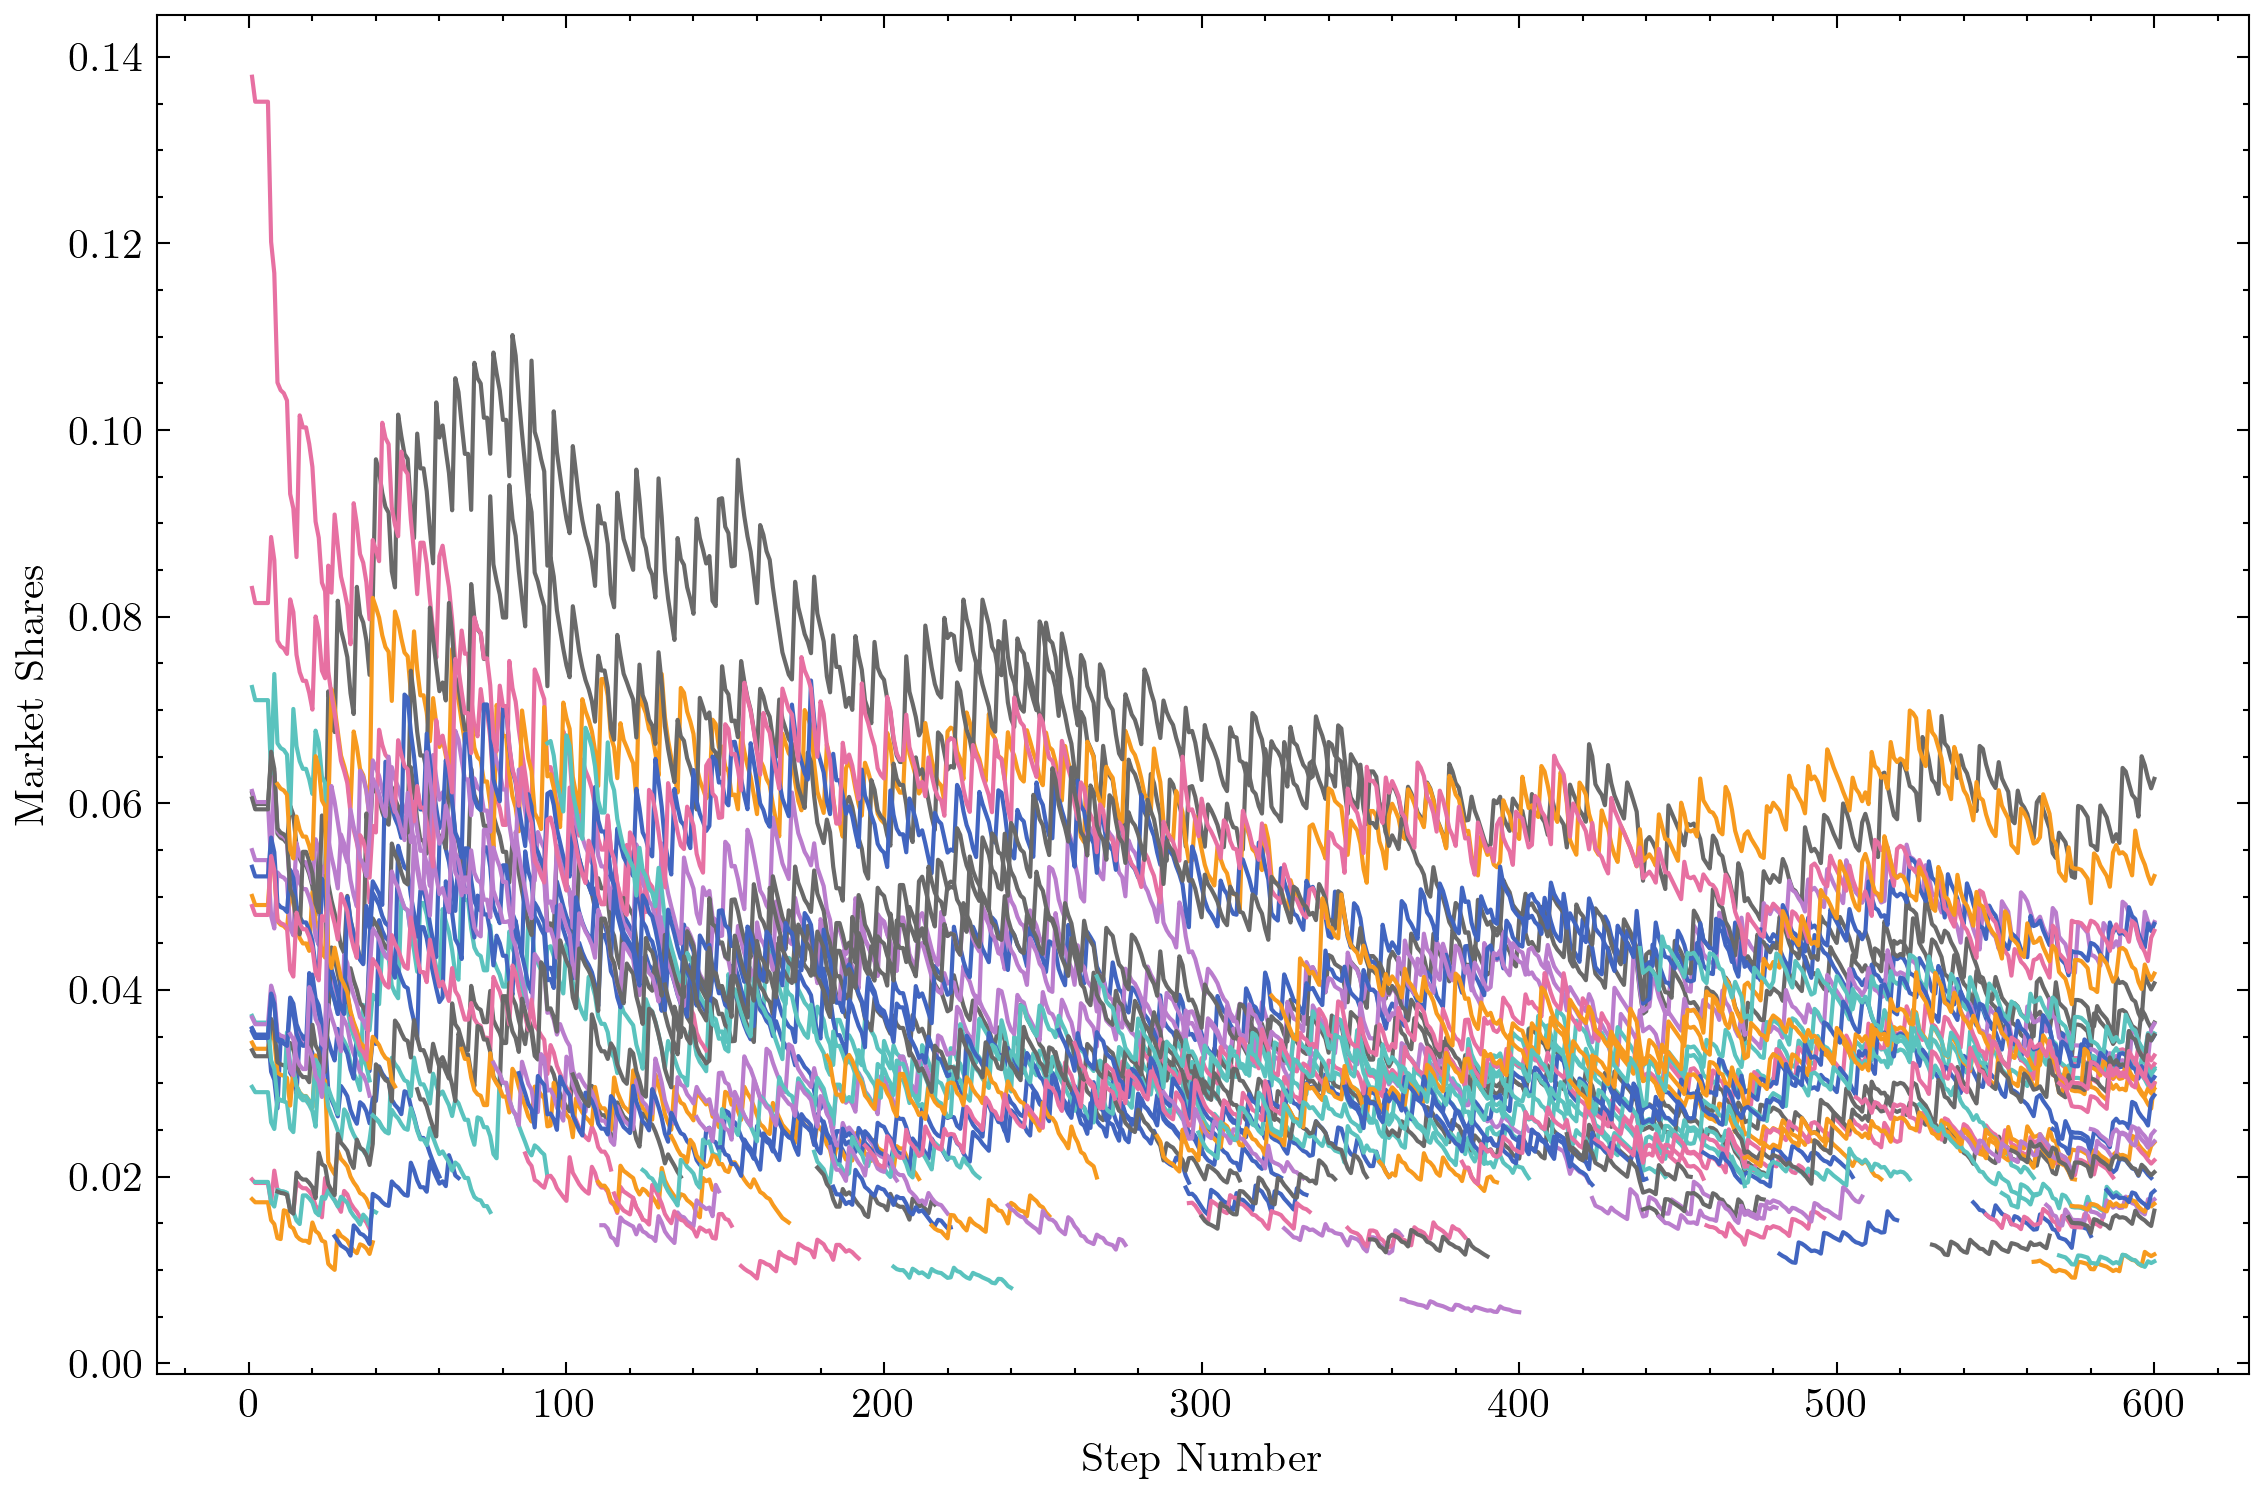

In [30]:
fig= plt.figure(figsize=(9,6), dpi = 300)
for i in agent_df.name.unique():
    plt.plot(agent_df[agent_df.name == i].step, agent_df[agent_df.name == i].ms_fs, label = "Firm " + str(i))

plt.xlabel("Step Number")
plt.ylabel("Market Shares ")
plt.show()

In [31]:
vc = agent_df.proj.value_counts()
vc

green         4950
False         4486
efficiency    3439
quality       3190
Name: proj, dtype: int64

In [32]:
round(100*vc["green"]/(vc["green"]+vc["efficiency"]+vc["quality"]),2)

42.75

In [33]:
agent_df[agent_df.name == 4].proj.value_counts()

False         18
quality       10
efficiency    10
Name: proj, dtype: int64

In [34]:
 sum(agent_df[agent_df.step == 1].g_fs * agent_df[agent_df.step == 1].ms_fs)

9.936930902152747

### Average Qualities During the Model Run

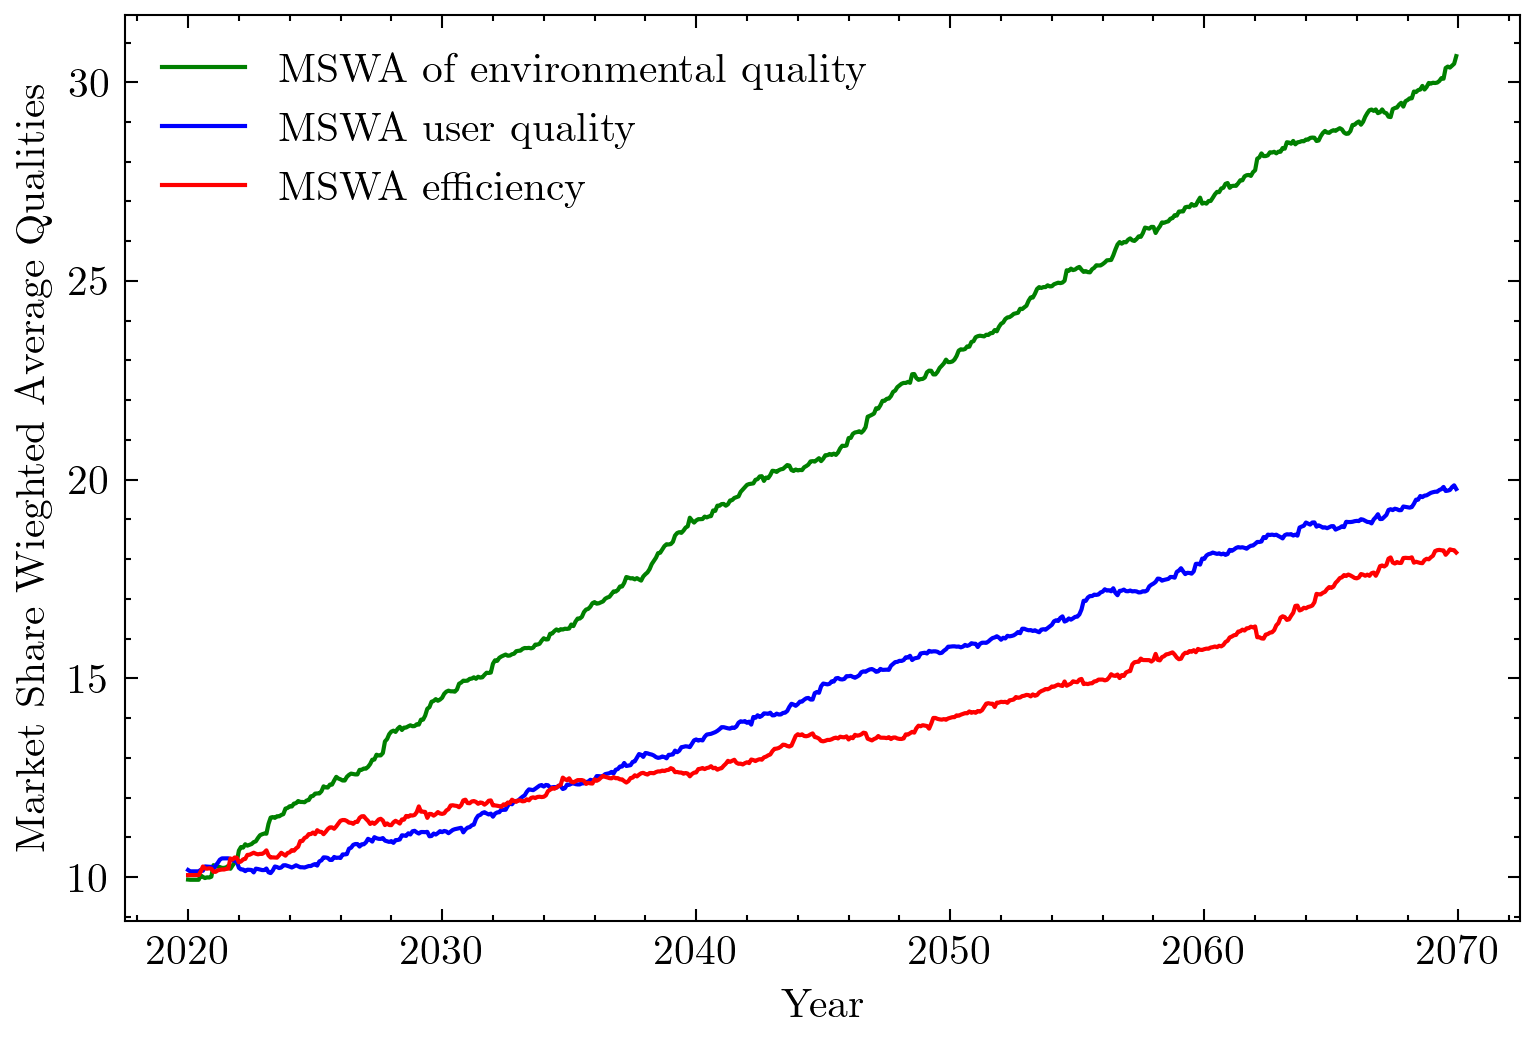

In [35]:
fig= plt.figure(figsize=(6,4), dpi = 300)
green = [] ; quality = [] ; efficiency = []
green2 = [] ; quality2 = [] ; efficiency2 = []
for i in agent_df.step.unique():
    # if i%10 ==0:
    green.append(sum(agent_df[agent_df.step == i].g_fs*agent_df[agent_df.step == i].ms_fs))
    quality.append(sum(agent_df[agent_df.step == i].b_fs*agent_df[agent_df.step == i].ms_fs))
    efficiency.append(sum(agent_df[agent_df.step == i].e_fs*agent_df[agent_df.step == i].ms_fs))
    green2.append(agent_df[agent_df.step == i].g_fs.mean())
    quality2.append(agent_df[agent_df.step == i].b_fs.mean())
    efficiency2.append(agent_df[agent_df.step == i].e_fs.mean())

    

plt.plot(x_lin,green, 'g', label = "MSWA of environmental quality" )
plt.plot(x_lin,quality, 'b', label = "MSWA user quality" )
plt.plot(x_lin,efficiency, 'r', label = "MSWA efficiency" )
# plt.plot(x_lin,green2, label = "Average environmental quality" )
# plt.plot(x_lin,quality2, label = "Average user quality" )
# plt.plot(x_lin,efficiency2, label = "Average efficiency" )

plt.xlabel("Year")
plt.ylabel("Market Share Wieghted Average Qualities ")

plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters//ModelVerification/Images/VerSinNoQual.pdf')

plt.show()

In [36]:
# fig= plt.figure(figsize=(6,4), dpi = 300)
# green = [] ; quality = [] ; efficiency = []
# for i in agent_df.step.unique():
#     # if i%10 ==0:
#     green.append(sum(agent_df[agent_df.step == i].g_fs*agent_df[agent_df.step == i].ms_fs))
#     quality.append(sum(agent_df[agent_df.step == i].b_fs*agent_df[agent_df.step == i].ms_fs))
#     efficiency.append(sum(agent_df[agent_df.step == i].e_fs*agent_df[agent_df.step == i].ms_fs))
#     green.append(sum(agent_df[agent_df.step == i].g_fs*agent_df[agent_df.step == i].ms_fs))
#     quality.append(sum(agent_df[agent_df.step == i].b_fs*agent_df[agent_df.step == i].ms_fs))
#     efficiency.append(sum(agent_df[agent_df.step == i].e_fs*agent_df[agent_df.step == i].ms_fs))

# plt.plot(x_lin,green, 'g', label = "environmental quality" )
# plt.plot(x_lin,quality, 'b', label = "user quality" )
# plt.plot(x_lin,efficiency, 'r', label = "efficiency" )

# plt.xlabel("Year")
# plt.ylabel("Market Share Wieghted Average Qualities ")

# plt.legend()
# # plt.savefig('../Writing/My_Thesis/Chapters/ModelResults/Images/AvgQualBaseCase20.pdf')

# plt.show()

In [37]:
print(round(green[0],2),round(green[-1],2),round(quality[-1],2),round(efficiency[-1],2))

9.94 30.66 19.76 18.17


In [38]:
for i in range(d_steps):
    if green[i] > 20:
        print(2020+i/12)
        break
for i in range(d_steps):
    if green[i] > 30:
        print(2020+i/12)
        break

2042.4166666666667
2069.25


#### Scatter plot of market share improvement and investment strategies

In [39]:
df_green_ms = pd.DataFrame(columns=['green','efficiency','quality','ms_improvement'], index = agent_df.name.unique())
for i in agent_df.name.unique():
    df_green_ms.loc[i,"green"] = agent_df[agent_df.name == i].green.iloc[0]
    df_green_ms.loc[i,"efficiency"] = agent_df[agent_df.name == i].efficiency.iloc[0]
    df_green_ms.loc[i,"quality"] = agent_df[agent_df.name == i].quality.iloc[0]

    df_green_ms.loc[i,"ms_improvement"] = agent_df[agent_df.name == i].ms_fs.iloc[-1] - agent_df[agent_df.name == i].ms_fs.iloc[0]


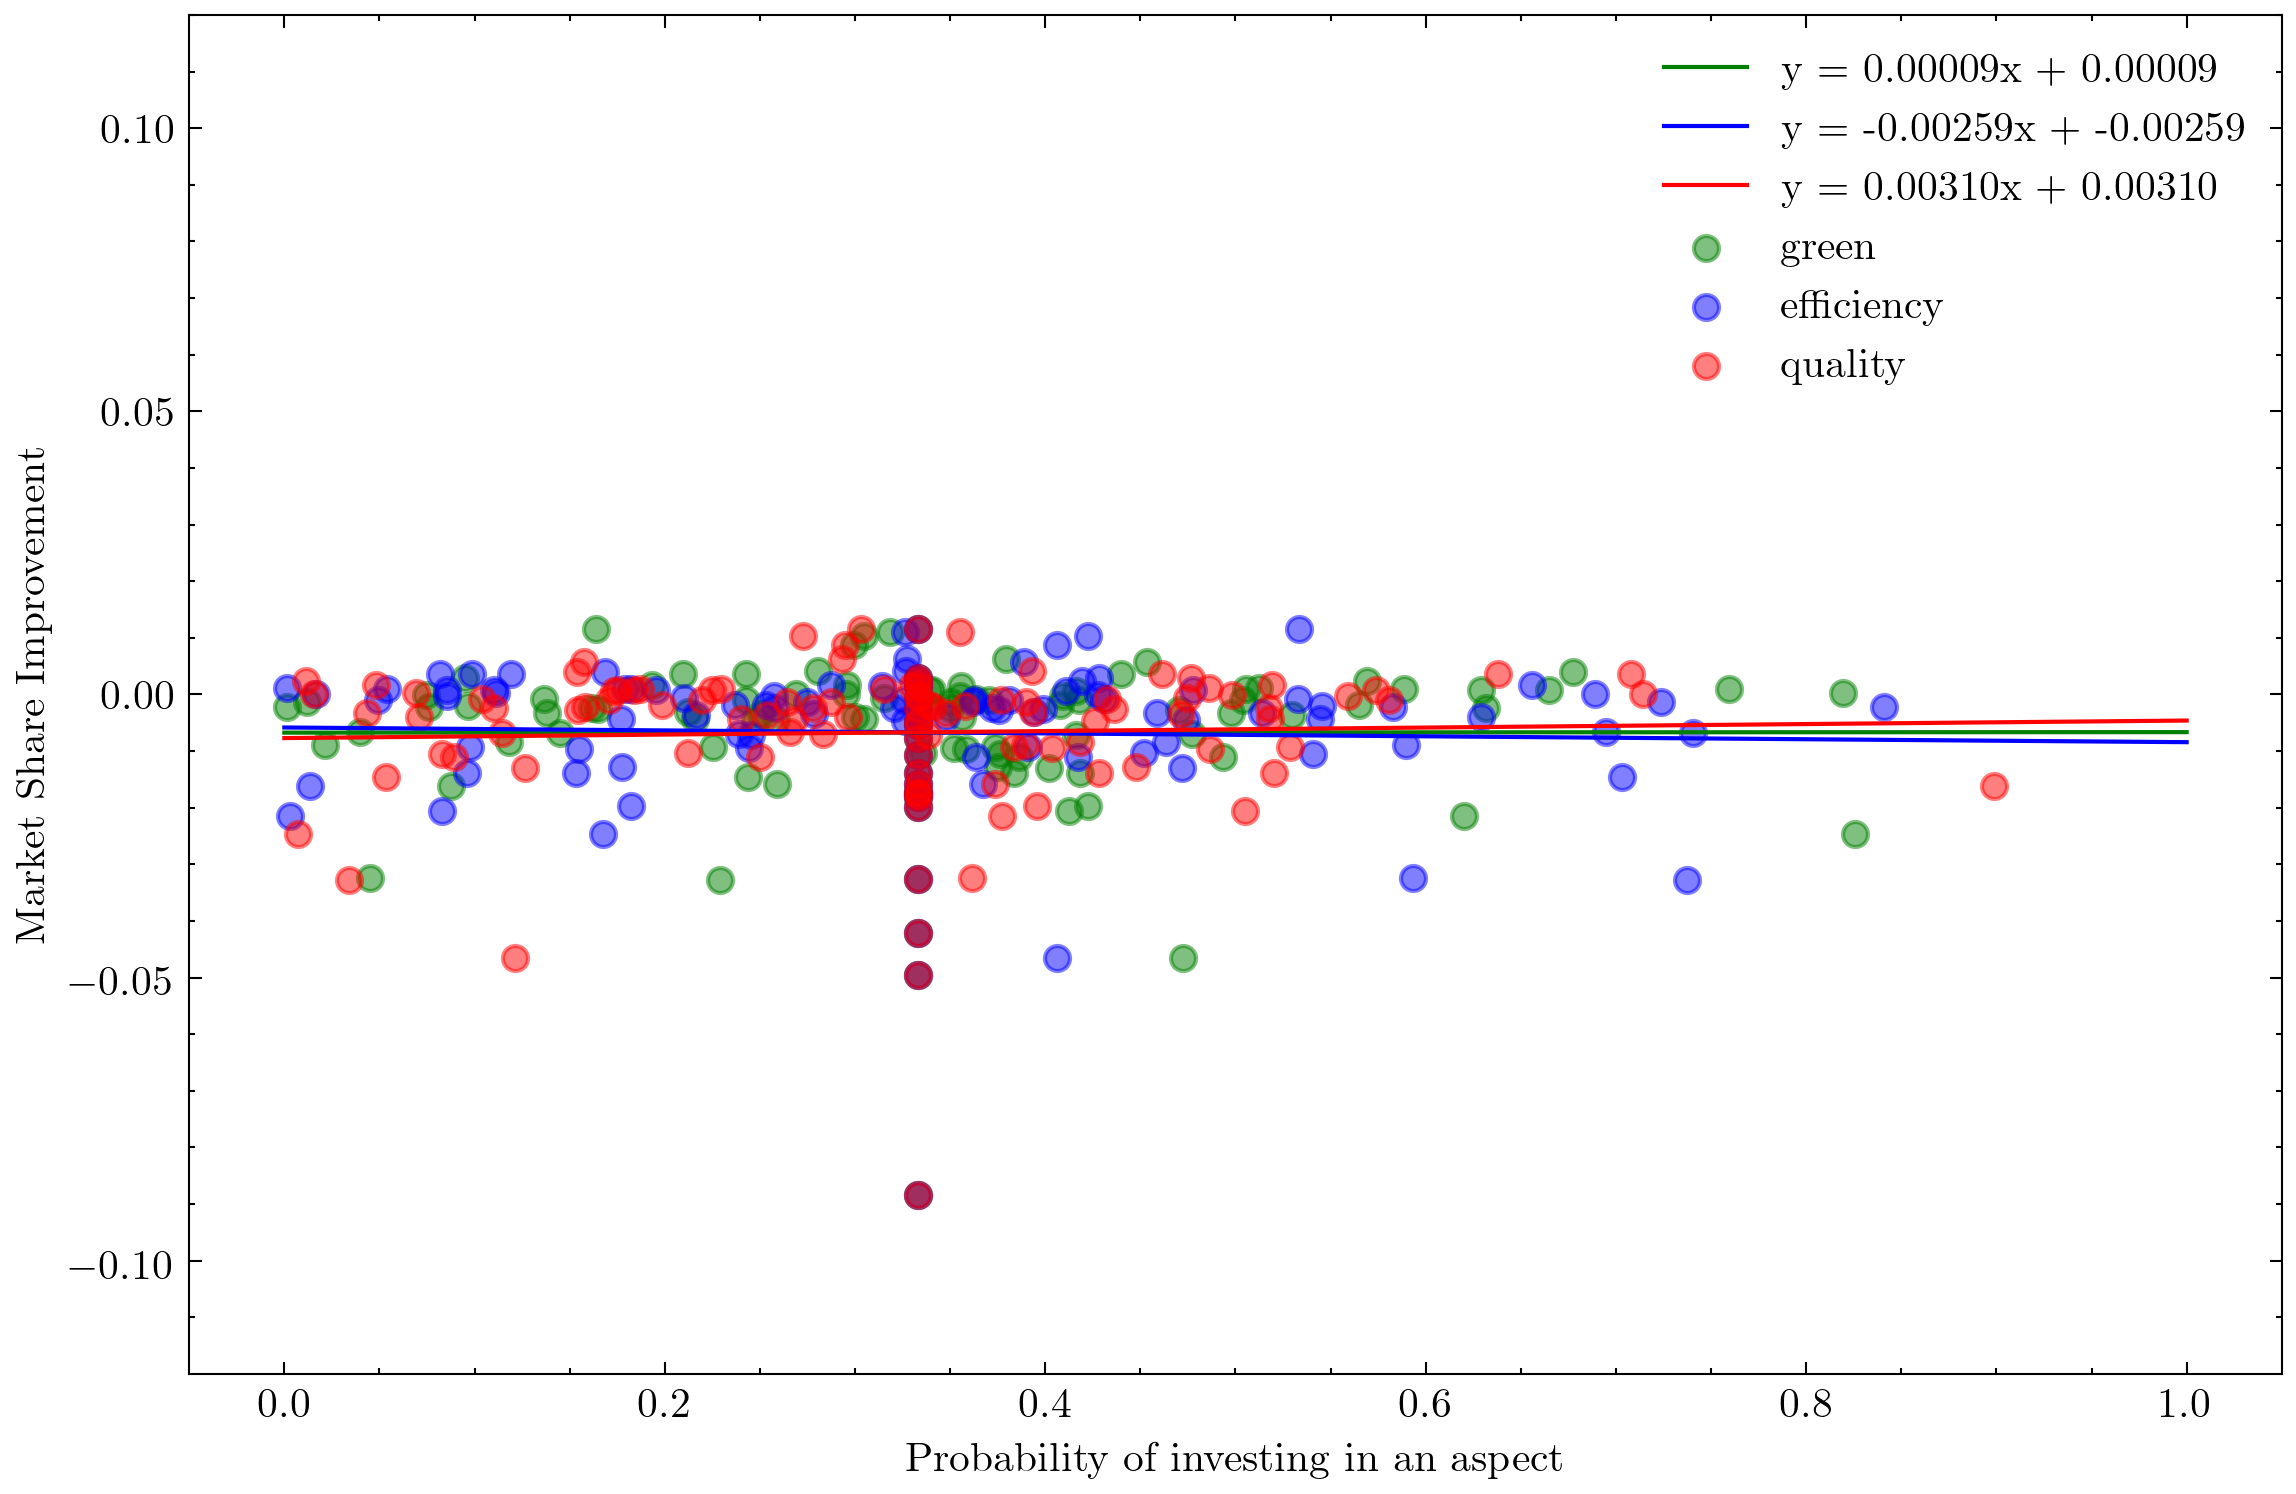

In [40]:
fig= plt.figure(figsize=(9,6),dpi = 300)
x = np.linspace(0,1,df_green_ms.ms_improvement.size)

ag, bg = np.polyfit(df_green_ms.green.astype(float),df_green_ms.ms_improvement.astype(float), deg=1)
y_green = ag * x + bg
ae, be = np.polyfit(df_green_ms.efficiency.astype(float),df_green_ms.ms_improvement.astype(float), deg=1)
y_efficiency = ae * x + be

aq, bq = np.polyfit(df_green_ms.quality.astype(float),df_green_ms.ms_improvement.astype(float), deg=1)
y_quality = aq * x + bq

plt.scatter(df_green_ms.green,df_green_ms.ms_improvement, label = "green", color =  'g',alpha = 0.5)
plt.plot(x,y_green, label = "y = {0:.5f}x + {0:.5f} ".format(ag,bg), color = 'g', linewidth = 1)

plt.scatter(df_green_ms.efficiency,df_green_ms.ms_improvement, label = "efficiency", color = 'b',alpha = 0.5)
plt.plot(x,y_efficiency, label = "y = {0:.5f}x + {0:.5f} ".format(ae,be) , color = 'b', linewidth = 1)

plt.scatter(df_green_ms.quality,df_green_ms.ms_improvement, label = 'quality', color =  'r', alpha = 0.5)
plt.plot(x,y_quality, label = "y = {0:.5f}x + {0:.5f} ".format(aq,bq), color = 'r', linewidth = 1)
plt.legend()

plt.ylim(-0.12,0.12)

plt.ylabel("Market Share Improvement")
plt.xlabel("Probability of investing in an aspect")


plt.show()

## Model Validation
Based on the three validation tests done by D'Orazio and Valente. 



### Procyclical investments

Positive relationship between investment levels and GDP growth. 
Doesn't make so much sense to check that in my opinion as it can be derived directly out of equation 19. 
Additionally they don't define what exactly investment growth rate is. 
So I just confirm here that there is a positive relationship.

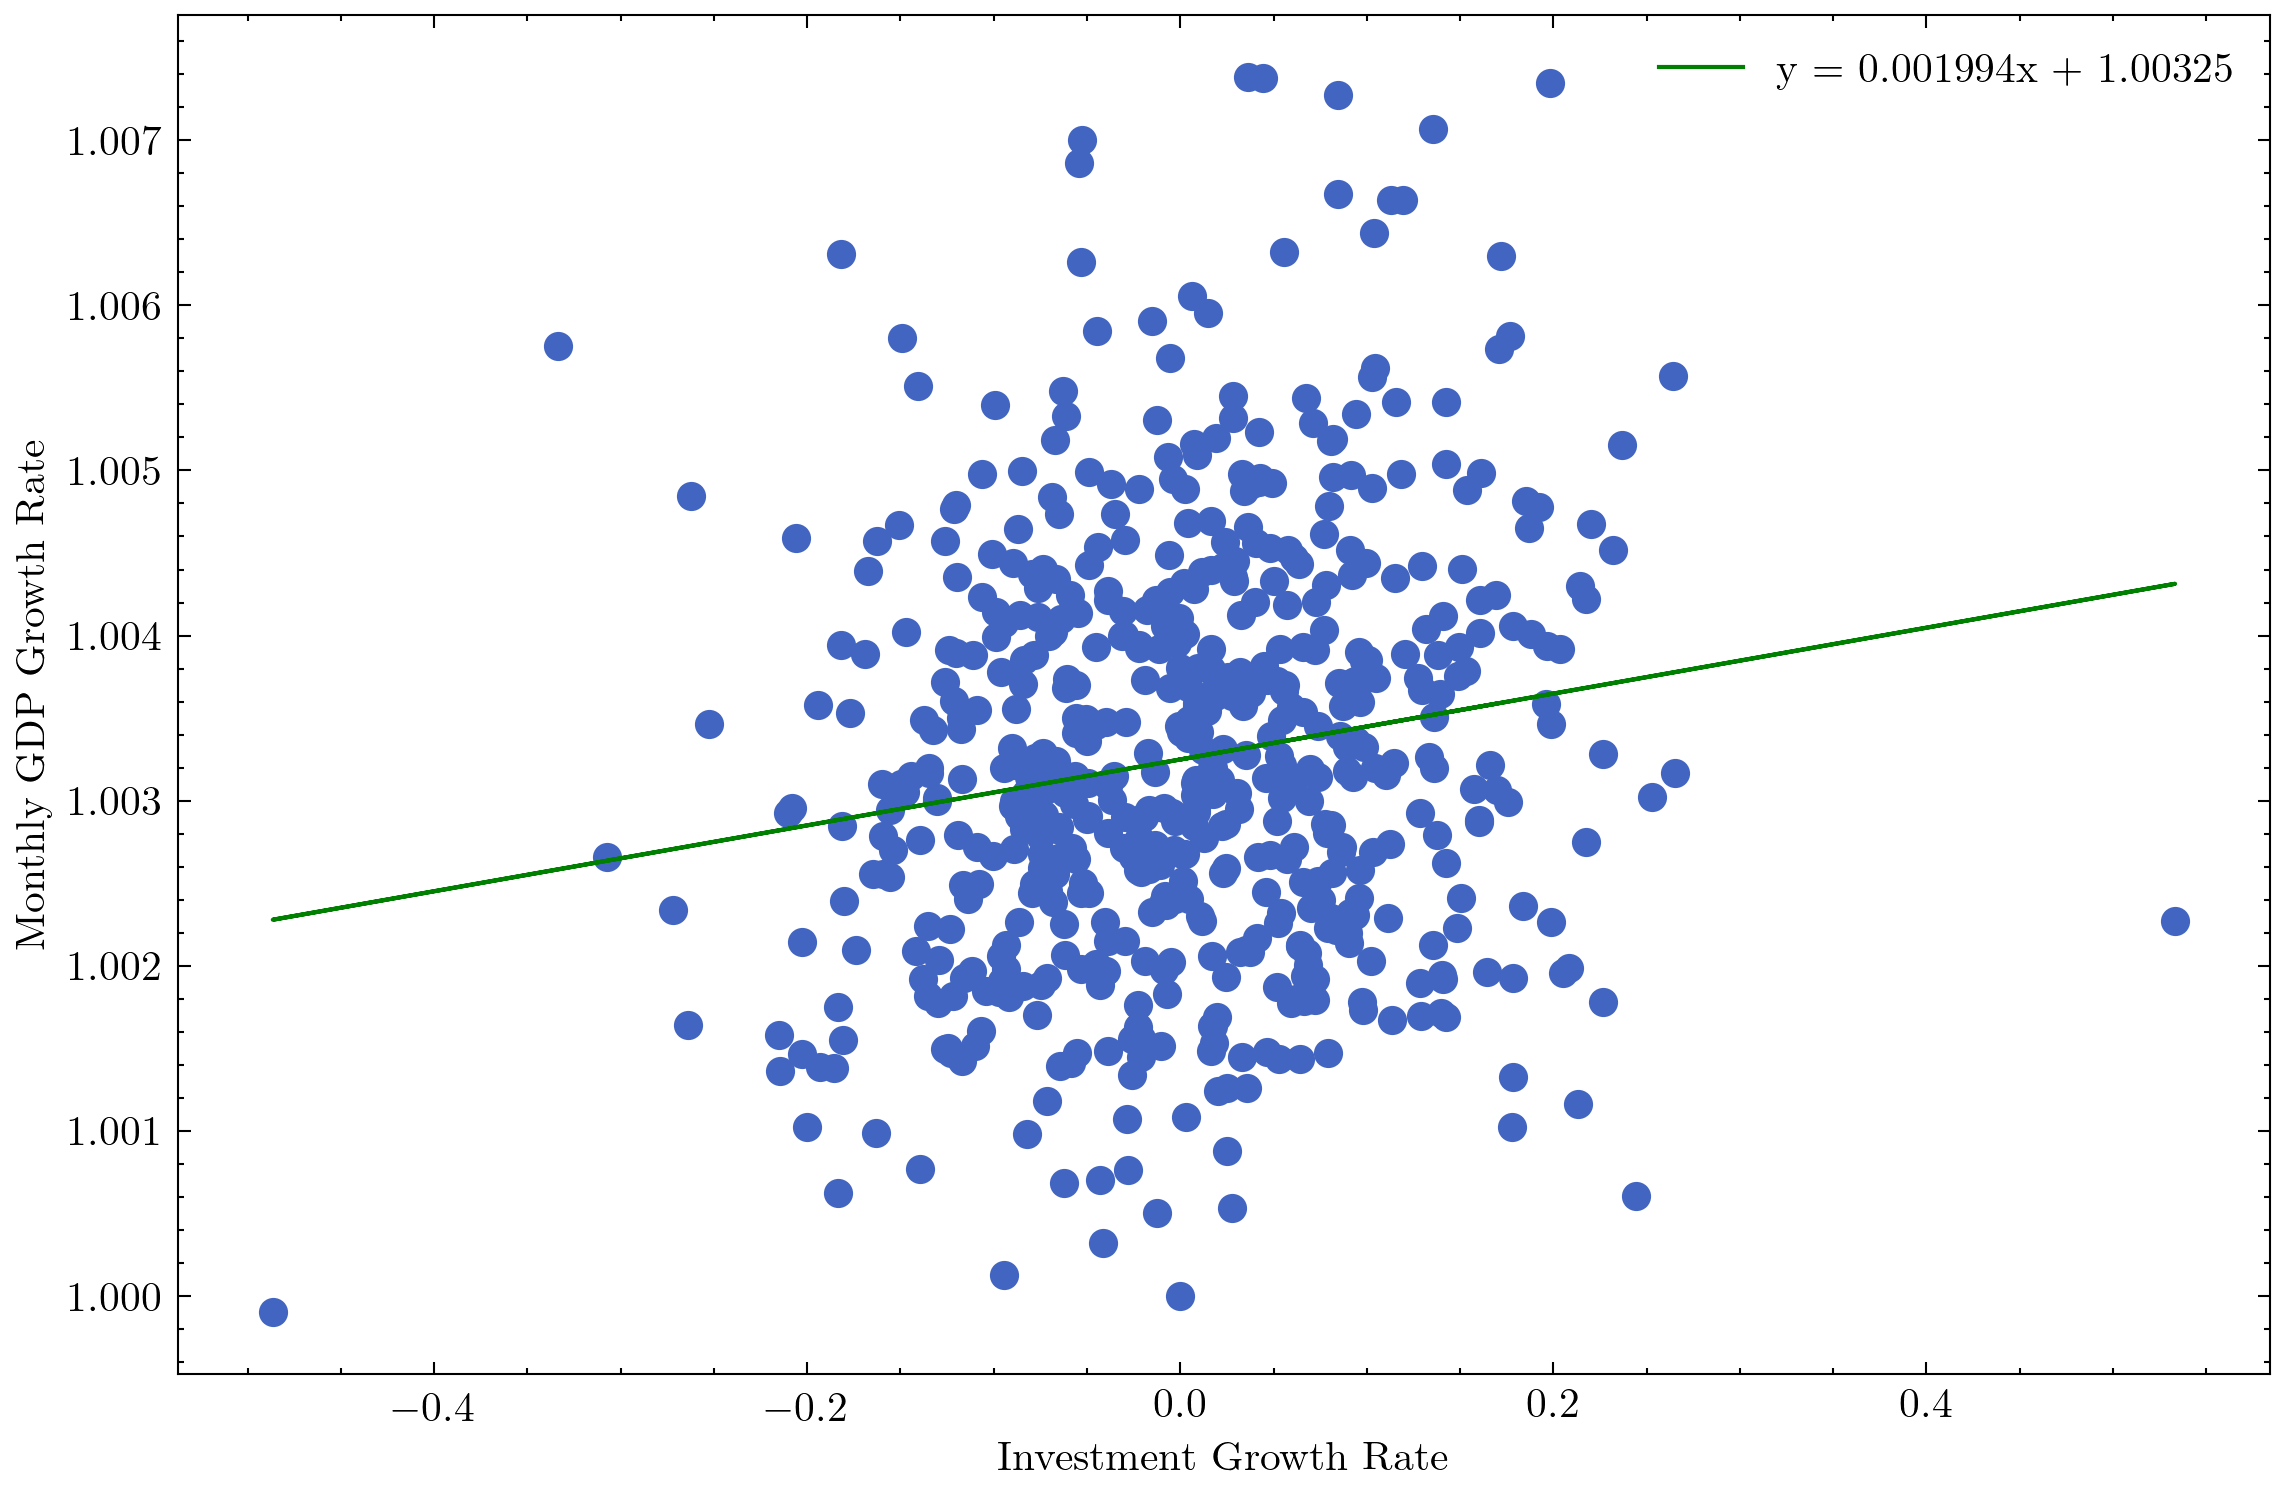

In [41]:

plt.style.use(['science','retro'])
plt.figure(num=None, figsize=(9,6 ), dpi=300)
model_df.head()
plt.scatter(model_df.InvestmentGrowth,model_df.GDPGrowth, label = 'quality')
# plt.xlim(-0.4,0.4)
a, b = np.polyfit(model_df.InvestmentGrowth,model_df.GDPGrowth, deg=1)
y = a * model_df.InvestmentGrowth + b
plt.plot(model_df.InvestmentGrowth,y,'g')
plt.xlabel('Investment Growth Rate')
plt.ylabel('Monthly GDP Growth Rate')
plt.legend(["y = " + str(round(a,6)) + "x + " + str(round(b,6))])

# plt.savefig('../Writing/My_Thesis/Chapters/ModelValidation/Images/Validation1.pdf')
plt.show()


### Firm's size distribution.

In [42]:
firms_gb = agent_df.groupby(['name'])
firms_gb2 = agent_df[agent_df.Step == d_steps]
market_shares = firms_gb[['ms_fs']].mean()
market_shares2 = firms_gb2[['ms_fs']]

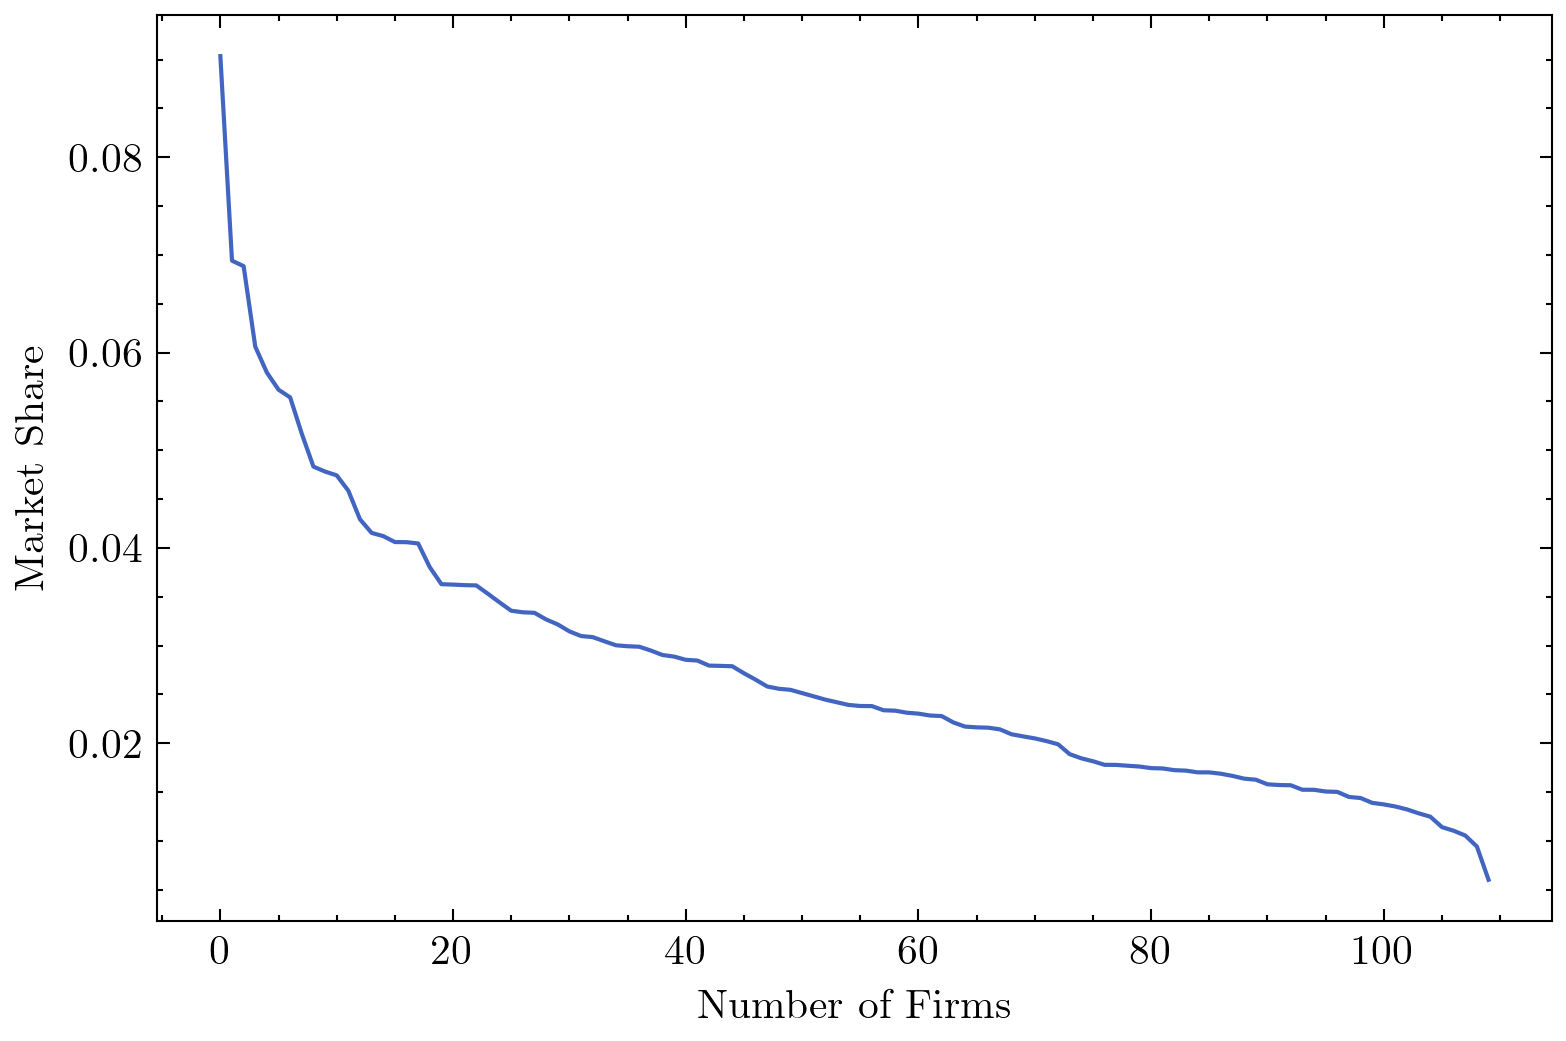

In [43]:
plt.figure(num=None, figsize=(6, 4), dpi=300)

market_shares.sort_values(by = 'ms_fs', ascending = False).reset_index().ms_fs.plot()
plt.ylabel('Market Share')
plt.xlabel('Number of Firms')


# plt.savefig('../Writing/My_Thesis/Chapters/ModelValidation/Images/Validation2.pdf')
plt.show()

### Frequencies of one-period GDP growth rates

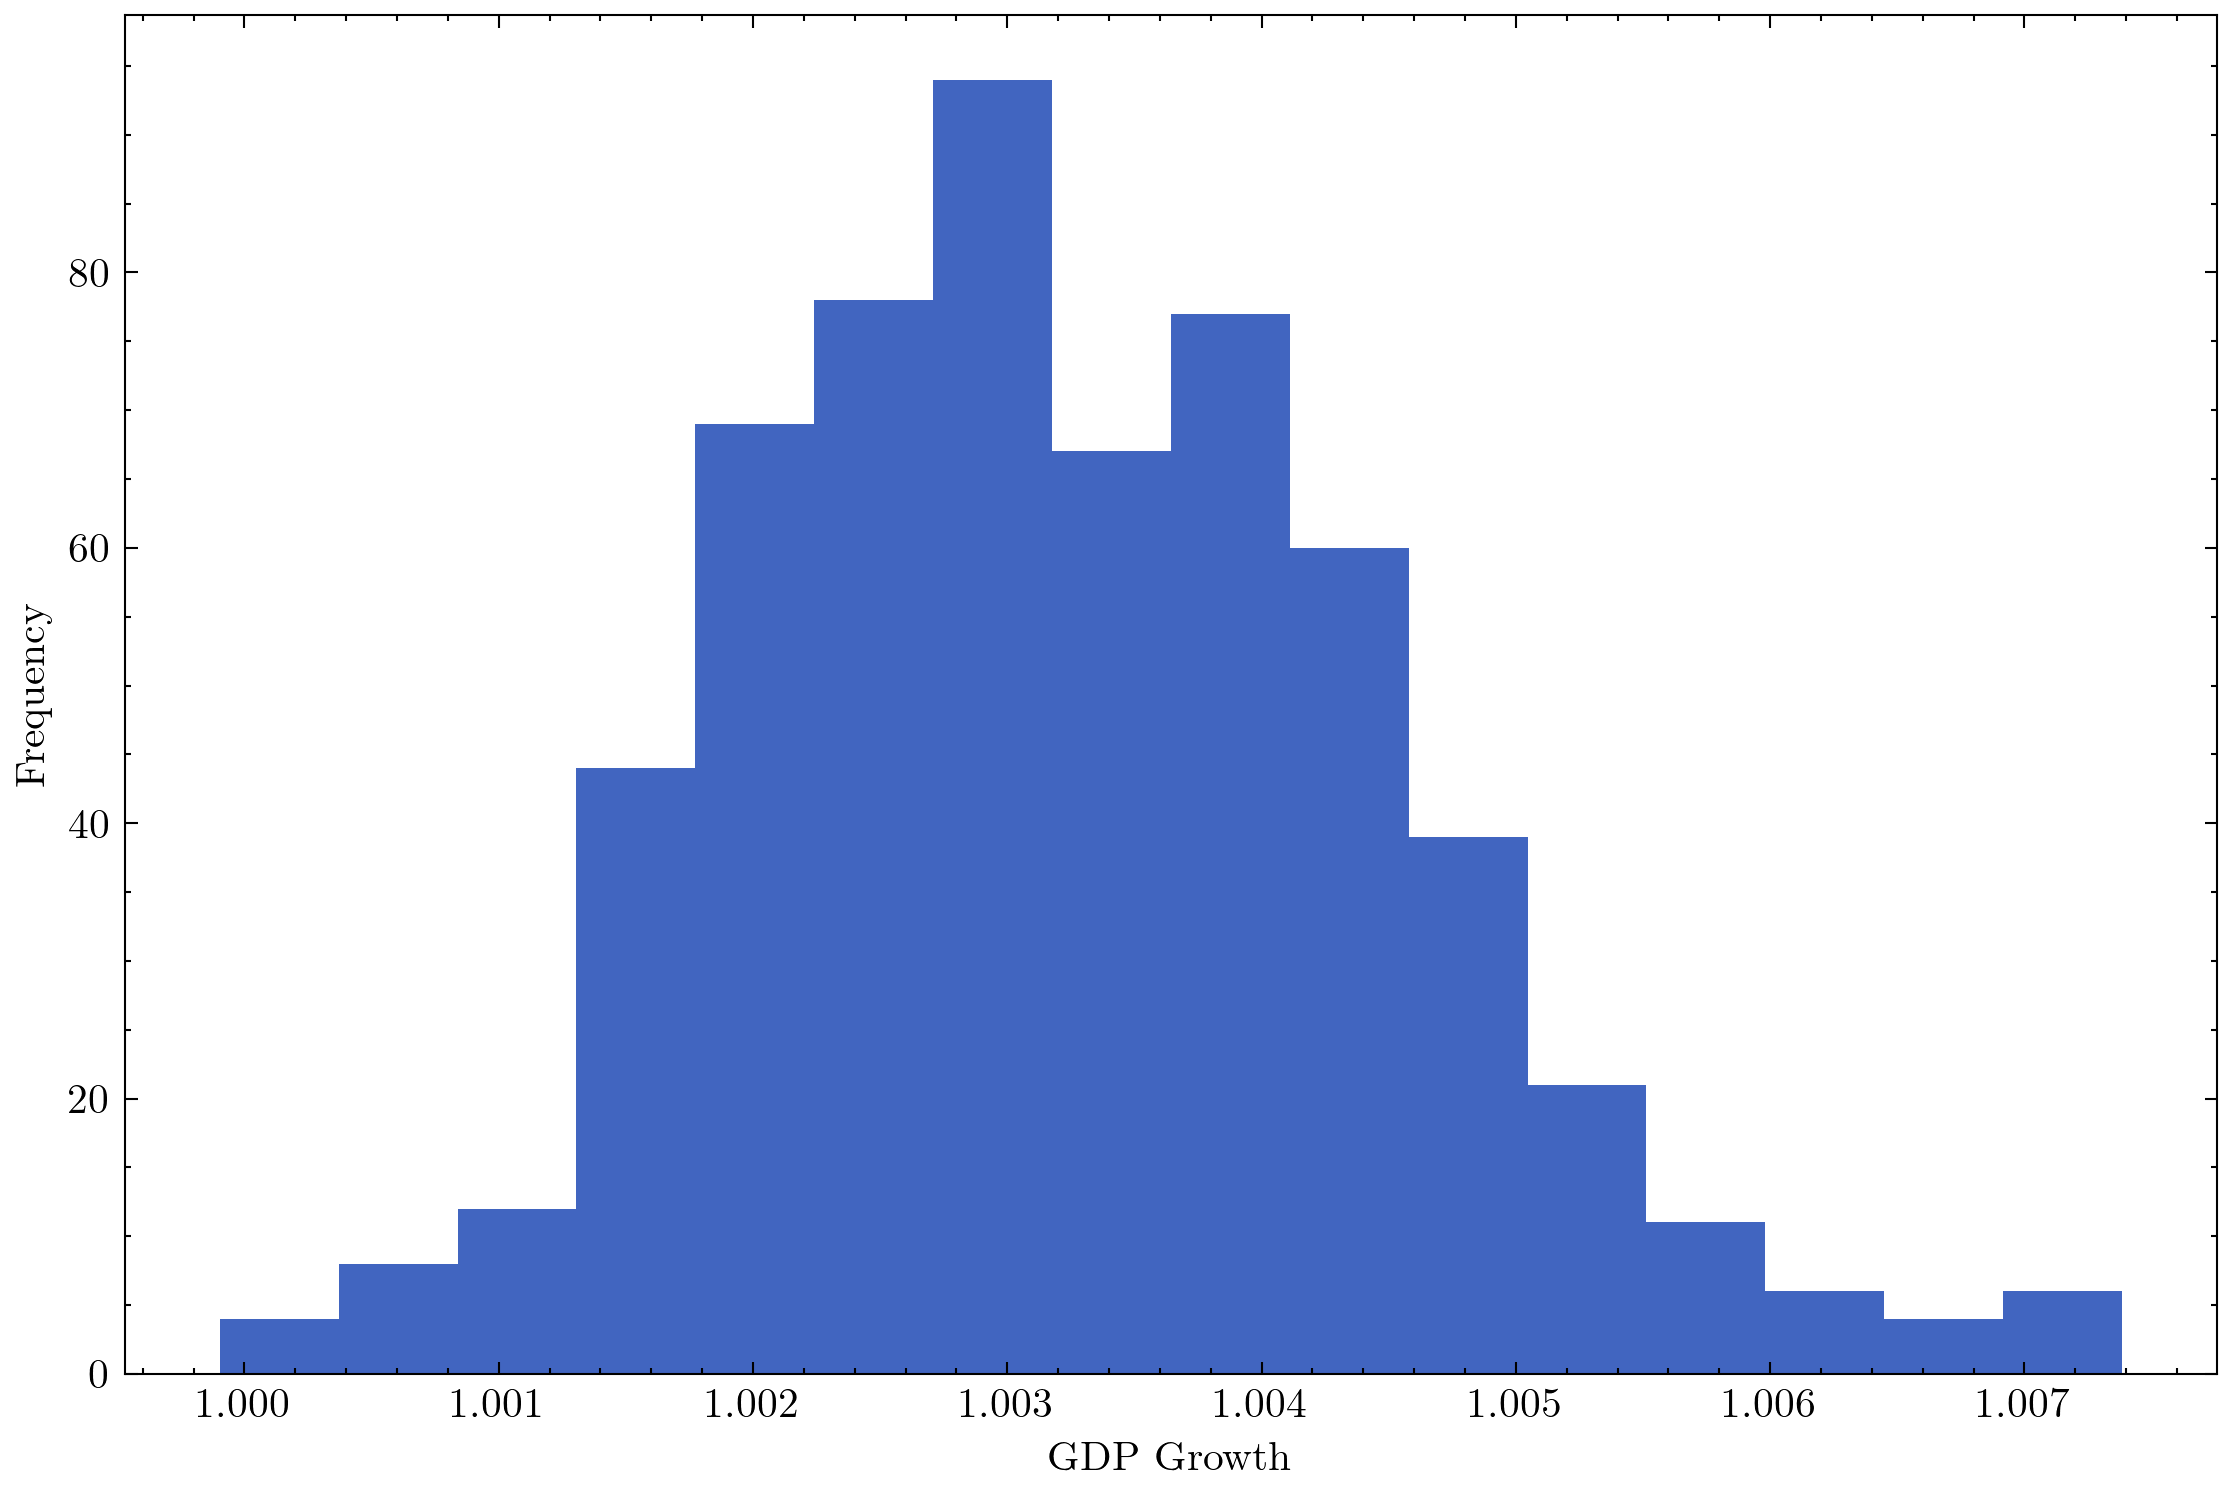

In [44]:
plt.figure(num=None, figsize=(9, 6), dpi=300)

plt.xlabel('GDP Growth')
plt.ylabel('Frequency')
# plt.xlim(0.9985,1.015)

model_df.GDPGrowth.plot.hist(bins=16)
# plt.savefig('../Writing/My_Thesis/Chapters/ModelValidation/Images/Validation3.pdf')

plt.show()